<a href="https://colab.research.google.com/github/ksb7762-k/Dart-B/blob/main/Rain_Predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain Predictive Analysis - EDA & ML Model Modeling

# **Table of Contents** (피쳐 엔지니어링 -> EDA -> 데이터 전처리 순?? 순서를 바꿔쓴 듯)

1. [Problem Statement](#1)
2. [Loading libraries](#2)
3. [Previewing dataset](#3)
4. [Column Description](#4)
5. [Getting know about dataset](#5)
6. [Handling Missing Values](#6)
7. [Feature Engineering](#7)
8. [Exploratory Data Analysis](#8)
9. [Preprocessing the Dara](#9)
10. [Logistic Regression Theory](#10)
11. [Assumptions for Machine Learning Model](#11)
12. [Class Imbalance (Oversampling)](#12)
13. [Feature and Target Variables](#13)
14. [Logistic Regression Model](#14)
15. [Random Forest Theory](#15)
16. [Random Forest Model](#16)
17. [Random Forest Hyperparameter Tuning](#17)
18. [XGBoost Theory](#18)
19. [XGBoost Model](#19)
20. [Model Comparison](#20)
21. [Conclusion](#21)

# 문제정의:  
이 프로젝트의 목표는 호주에 비가 올지 안올지 예측하는 것이다.  
비 예측은 기온, 습도, 풍속, 풍향 등 많은 변수들에 달려있다.  
우리의 프로젝트에서 우리는 최대한의 정확도와 최소한의 오차로 비가 올지 안올지 예측할 수 있는 모델을 만들기를 원한다.  


# Loading libraries (importing이라 안하고 loading이라 하네)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

%matplotlib inline

# 라이브러리는 해당 코드 사용시에 같이 정리




# 데이터셋 간단히 살피기

In [ ]:
# 경고 문구 피하기
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 모든 칼럼 보이게 하기
pd.set_option('display.max_columns', None)

In [ ]:
# 데이터 로딩
df = pd.read_csv('/content/drive/MyDrive/kagglestudy/weatherAUS.csv')
# 데이터 간단히 살피기
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 컬럼 설명

- **Date**: 관측 날짜 (형식: YYYY-MM-DD)
- **Location**: 관측 지점 이름
- **MinTemp**: 최저 기온 (°C)
- **MaxTemp**: 최고 기온 (°C)
- **Rainfall**: 일일 강수량 (mm)
- **Evaporation**: 9AM까지의 24시간 동안 팬 증발량 (mm)
- **Sunshine**: 하루 동안 햇빛이 비친 시간 (시간 단위)
- **WindGustDir**: 가장 강한 돌풍 방향 (방위각, 예: N, NE 등)
- **WindGustSpeed**: 가장 강한 돌풍 속도 (km/h)
- **WindDir9am**: 오전 9시 풍향
- **WindDir3pm**: 오후 3시 풍향
- **WindSpeed9am**: 오전 9시 평균 풍속 (km/h)
- **WindSpeed3pm**: 오후 3시 평균 풍속 (km/h)
- **Humidity9am**: 오전 9시 습도 (%)
- **Humidity3pm**: 오후 3시 습도 (%)
- **Pressure9am**: 오전 9시 해수면 기준 기압 (hPa)
- **Pressure3pm**: 오후 3시 해수면 기준 기압 (hPa)
- **Cloud9am**: 오전 9시 구름량 (0~8, 옥타 단위)
- **Cloud3pm**: 오후 3시 구름량 (0~8, 옥타 단위)
- **Temp9am**: 오전 9시 기온 (°C)
- **Temp3pm**: 오후 3시 기온 (°C)
- **RainToday**: 오늘 강수 여부 (1: 비 > 1mm, 0: 비 안 옴)
- **RainTomorrow**: 내일 강수량 (mm) 및 강수 가능성(Target 변수)



# 옥타(Okta) 단위란?

- **옥타(Okta)**는 하늘을 8등분하여, 구름이 차지하는 비율을 0부터 8까지의 숫자로 나타낸 단위.
- 하늘을 8조각으로 가정했을 때, 구름이 몇 조각을 덮고 있는지를 수치로 표현

## 옥타 값에 따른 의미

- **0 옥타**: 완전히 맑음 (구름 없음)
- **1~2 옥타**: 거의 맑음
- **3~5 옥타**: 부분적으로 흐림
- **6~7 옥타**: 대부분 흐림
- **8 옥타**: 완전히 흐림 (하늘 전체가 구름)

# Getting know about dataset



In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
print(f'The no. of rows in dataset is {df.shape[0]} \n The no. of columns are {df.shape[1]}')

The no. of rows in dataset is 145460 
 The no. of columns are 23


In [ ]:
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [ ]:
df.select_dtypes(exclude = 'object').describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


describe()에서 exclude 쓸 수도 있음 (더 짧음)

# Handling missing values

In [ ]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
df.isnull().sum() / df.shape[0] * 100

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


# Plotting missing values

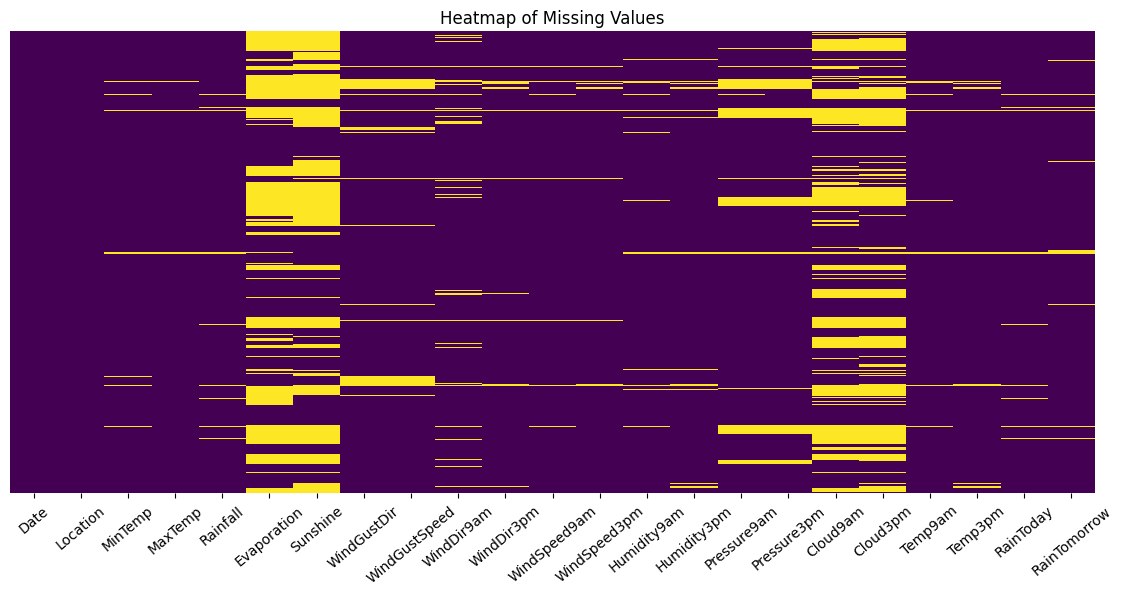

In [ ]:
plt.figure(figsize = (14, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.xticks(rotation=40)
plt.title('Heatmap of Missing Values')
plt.show()

데이터프레임에서 결측값이 어디에 얼마나 분포되어 있는지를 표시   
==> 이런 시각화는 차라리 안하는 게 나을듯함  

yticklabels=True로 놓고 돌리면 시간이 너무 오래걸려서 pass



# MSNO로 시각화해봤어요 뭐가 더 나은지

<Figure size 1400x600 with 0 Axes>

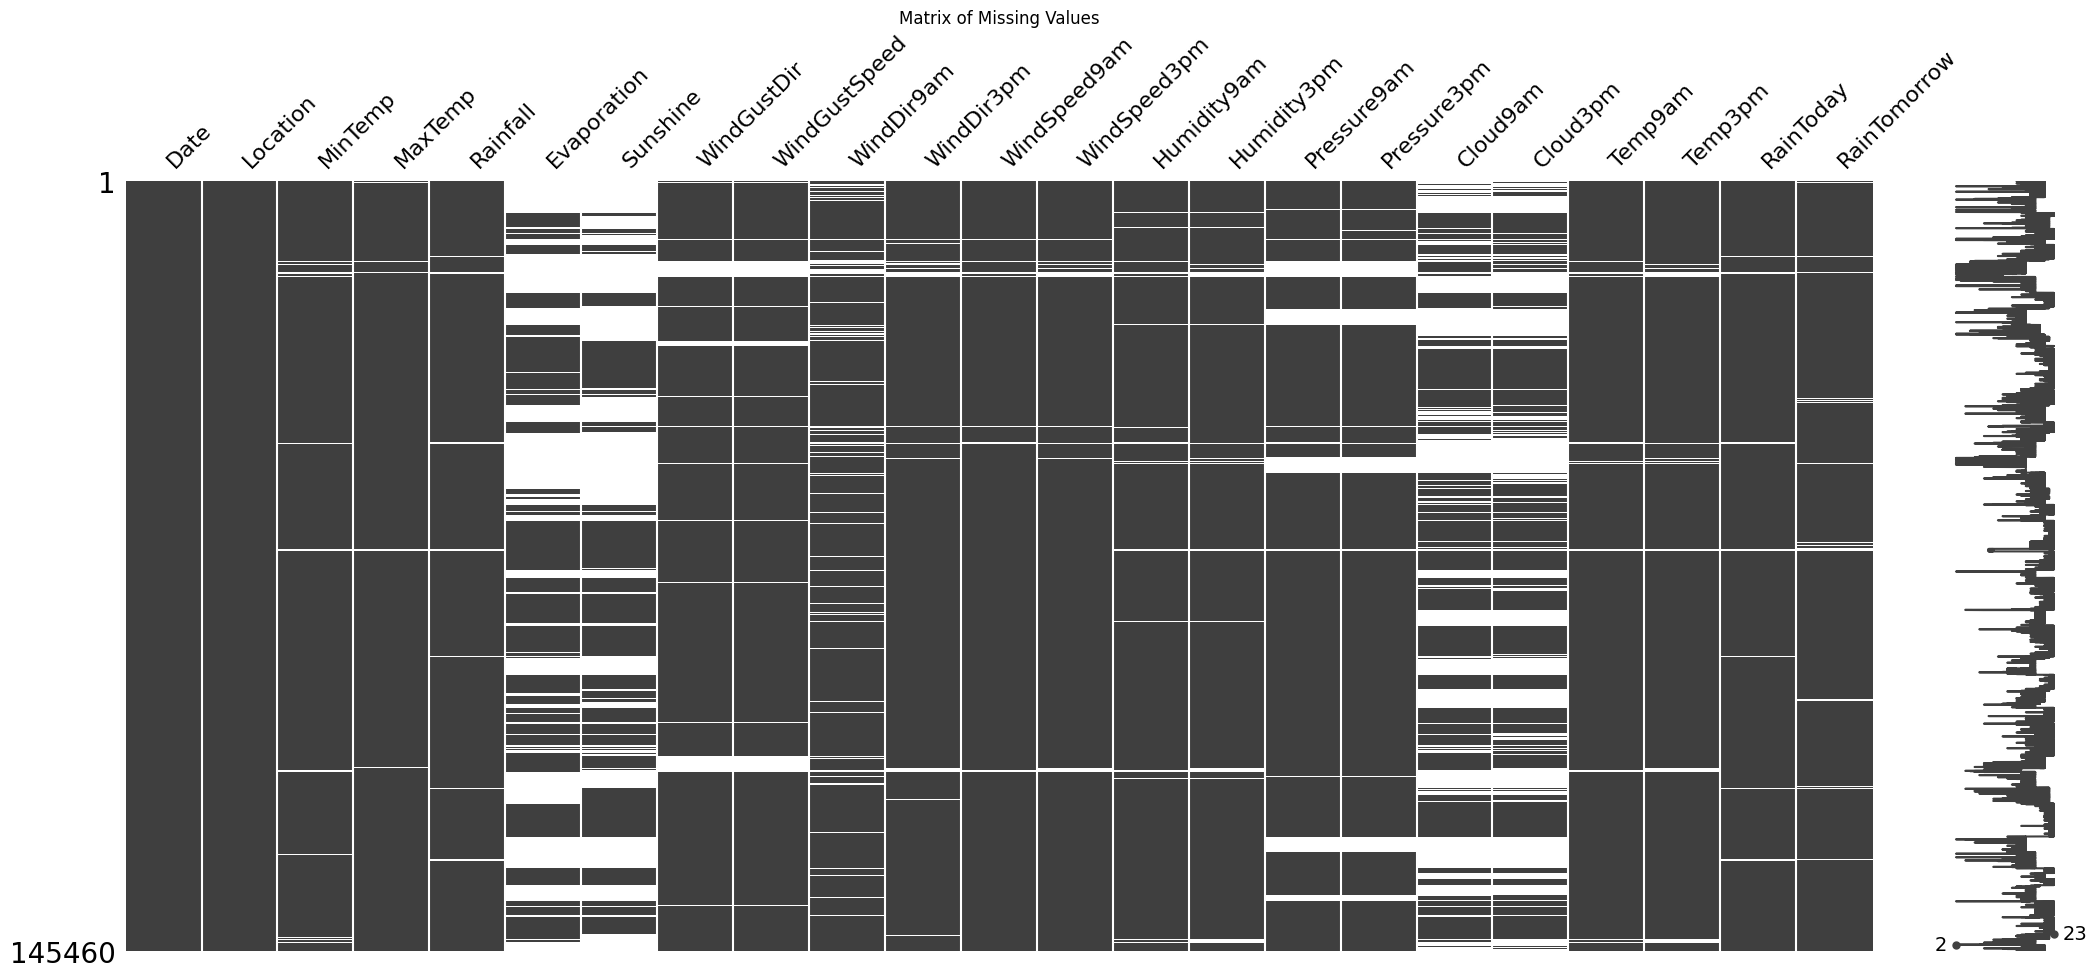

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# 결측값 매트릭스 시각화
plt.figure(figsize=(14, 6))
msno.matrix(df)
plt.title('Matrix of Missing Values')
plt.show()


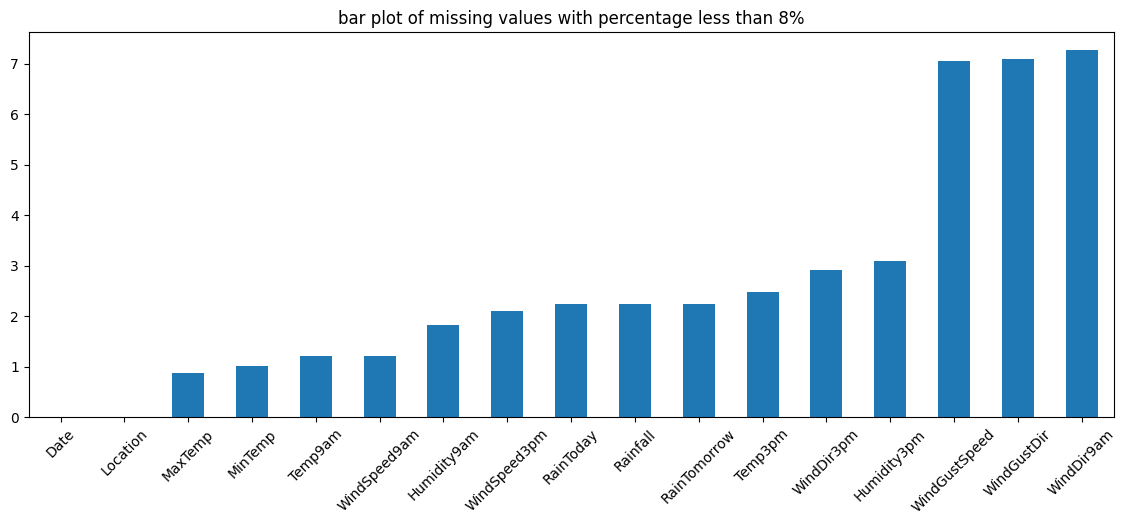

In [ ]:
plt.figure(figsize=(14,5))
missing = df.isnull().sum() / df.shape[0] * 100
missing = missing[missing < 8].sort_values().plot.bar()
plt.xticks(rotation=45)
plt.title('bar plot of missing values with percentage less than 8%')
plt.show()

# 8퍼센트를 기준으로 잡은 이유에 대한 언급은 없음

# 결측치 처리 (Imputing missing values)

In [ ]:
unique_location = df['Location'].unique()

for column in df.select_dtypes(exclude = 'object'):
  if df[column].isnull().any():
    for location in unique_location:
      location_median = df[df['Location'] == location][column].median()
      df.loc[df['Location'] == location, column] = df[df['Location'] == location][column].fillna(location_median)
  elif df.select_dtypes(include = 'object'):
    for location in unique_location:
      location_mode = df[df['Location'] == location][column].mode()[0]
      df.loc[df['Location'] == location, column ] = df[df['Location'] == location][column].fillna(location_mode)

숫자형 컬럼은 같은 지역 데이터의 **중앙값**으로  
문자형 컬럼은 같은 지역 데이터의 **최빈값**으로 채움  

==> 1. 같은 지역에서 날짜별로 나눠보았으면 어땠을까 2. 만약에 데이터 분포를 안보고 어떤 통계량을 사용할지 결정한다면 평균보다 중앙값이 나을 수도 있겠다는 생각

In [ ]:
# 결과 확인
df.isna().sum() / len(df) * 100

,0
Date,0.000000
Location,0.000000
MinTemp,0.000000
MaxTemp,0.000000
Rainfall,0.000000
Evaporation,31.287639
Sunshine,36.552317
WindGustDir,7.098859
WindGustSpeed,4.179156
WindDir9am,7.263853


### 📌 관찰 (Observation)

데이터셋에는 여전히 일부 결측값이 남아 있음     
이러한 결측값들은 앞서 사용한 보간(imputation) 방법으로는 채울 수 없음     
그 이유는, 위에서 언급한 결측값들은 특정 Location(지역)에 대해 아예 수집되지 않았기 때문   
따라서 전체 데이터셋의 평균(mean)이나 중앙값(median)으로 이러한 결측값을 채우는 것은 적절하지 않음  
이는 Location 컬럼에 포함된 각 도시(city)마다 고유한 인구 통계적 특성과 기후 조건(weather conditions)을 가지고 있기 때문  


# 처음에는 결측값이 아직도 있는 이유를 이해 못했는데 설마하고 특정 지역의 특정 컬럼이 아예 존재하지 않는지 확인하는 코드 짜달라고 했더니 실제로 특정 컬럼에 데이터가 아예 없는 location이 있었다

In [ ]:
# 결과를 저장할 빈 리스트 만들기
empty_location_columns = []

# 유니크한 Location 가져오기
unique_locations = df['Location'].unique()

# 전체 컬럼에 대해 반복
for column in df.columns:
    if column == 'Location':
        continue  # Location 컬럼 자체는 건너뜀
    for location in unique_locations:
        # 해당 Location과 컬럼만 따로 추출
        subset = df[df['Location'] == location][column]

        # 만약 전부 NaN이면 기록
        if subset.isnull().all():
            empty_location_columns.append((location, column))

# 결과 출력
for location, column in empty_location_columns:
    print(f"Location '{location}' has all missing values in column '{column}'")


Location 'Albury' has all missing values in column 'Evaporation'
Location 'BadgerysCreek' has all missing values in column 'Evaporation'
Location 'Newcastle' has all missing values in column 'Evaporation'
Location 'NorahHead' has all missing values in column 'Evaporation'
Location 'Penrith' has all missing values in column 'Evaporation'
Location 'Wollongong' has all missing values in column 'Evaporation'
Location 'Tuggeranong' has all missing values in column 'Evaporation'
Location 'MountGinini' has all missing values in column 'Evaporation'
Location 'Ballarat' has all missing values in column 'Evaporation'
Location 'Nhil' has all missing values in column 'Evaporation'
Location 'GoldCoast' has all missing values in column 'Evaporation'
Location 'Witchcliffe' has all missing values in column 'Evaporation'
Location 'PearceRAAF' has all missing values in column 'Evaporation'
Location 'SalmonGums' has all missing values in column 'Evaporation'
Location 'Walpole' has all missing values in c

# 결측치가 있는 행 삭제

In [ ]:
df.dropna(subset=['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Pressure9am', 'Pressure3pm', 'RainToday', 'RainTomorrow',
                  'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
          ,inplace = True, axis = 0)
# 지정한 컬럼들 중에서 결측치가 하나라도 있으면 행 방향 (axis = 0)으로 행 전체를 삭제하라는 뜻

In [ ]:
df.reset_index(drop=True, inplace=True)

행을 삭제했을 때 자동으로 index를 앞에서부터 다시 채워주는 기능은 기본적으로 없음  
==> reset_index를 해줘야함

In [ ]:
df.shape

(72866, 23)

### 📌 관찰 (Observation)

결측값이 있는 행(row)을 삭제하기 전에는 데이터프레임에 총 145,460개의 행이 존재했음  
하지만 삭제 후에는 72,866개의 행만 남게 되었음    
이는 총 72,594개의 행이 삭제된 것으로, 전체 데이터셋의 약 50%에 해당하는 행이 제거된 것

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


# Feature Engineering

In [ ]:
print(f'The data type of Date column is {df.Date.dtype}')

The data type of Date column is object


datetime으로 데이터 타입 변환

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

date에서 feature 추출하기

In [ ]:
 df['Day'] = df['Date'].dt.day
 df['month'] = df['Date'].dt.month
 df['year'] = df['Date'].dt.year

In [ ]:
df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,1,1,2009
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2,1,2009
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,4,1,2009
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,5,1,2009
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,6,1,2009


# EDA

각 칼럼의 고유값 개수 확인

In [ ]:
df.nunique().sort_values(ascending = True)

,0
RainToday,2
RainTomorrow,2
Cloud3pm,10
Cloud9am,11
year,11
month,12
WindGustDir,16
WindDir9am,16
WindDir3pm,16
Location,26


# -----------------------------------------------------------------------------

In [ ]:
df['Cloud9am'].unique()

array([2. , 1. , 8. , 3. , 0. , 4. , 7. , 5. , 6. , 4.5, 9. ])

In [ ]:
df['Cloud3pm'].unique()

array([5., 1., 6., 8., 2., 3., 0., 7., 4., 9.])

위에서 변수 정의할 때 Cloud는 값이 0~8까지라고 했는데 4.5, 9가 존재함  
 찾아보니 좀 더 세밀하게 표현하기 위해서 0.1단위까지 표현하기도 한다고 함  
 그리고 9는 안개 또는 폭설로 인해 구름이 완전히 뒤덮은 상태를 의미한다고 함  



In [ ]:
df[df['Cloud9am'] == 9]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
22438,Canberra,0.6,14.5,0.0,3.6,7.8,SW,30.0,NNW,SSW,4.0,9.0,99.0,41.0,1022.4,1020.7,9.0,5.0,4.4,14.2,No,No,27,5,2012


In [ ]:
df[df['Cloud3pm'] == 9]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
56318,Woomera,10.6,24.6,0.2,11.6,11.4,SSE,39.0,SE,ESE,26.0,17.0,45.0,13.0,1019.0,1015.2,6.0,9.0,14.8,23.7,No,No,2,11,2012


# --------------------------------------------------------------------------------

# 중복 행 확인

In [ ]:
print('duplicate rows = ', df.duplicated().sum())

duplicate rows =  0


# pandas `duplicated()` 함수 정리

## 개요
- DataFrame이나 Series에서 **중복된 행을 찾는 함수**.

## 기본 동작
- `subset=None`이 기본값이며, **모든 열**을 기준으로 중복을 판단.
- `keep='first'`가 기본값이며, **첫 번째 중복은 남기고 이후 중복만 True**로 표시.

## 주요 파라미터
- `subset`: 중복을 판단할 기준이 되는 **열 이름 리스트**. 기본은 전체 열.
- `keep`: 중복 데이터 중 어떤 것을 **True로 표시할지 결정**.
  - `'first'`: 첫 번째 항목은 남기고, 이후 중복 항목을 True로 표시.
  - `'last'`: 마지막 항목은 남기고, 그 전 중복 항목을 True로 표시.
  - `False`: 모든 중복 항목을 True로 표시.

## 반환값
- 각 행이 중복인지 여부를 나타내는 **불리언 Series**.

## 예시 코드
```python
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 2, 3],
    'B': [5, 6, 6, 7]
})

# 중복 여부 확인
df.duplicated()

# 중복 개수 세기
df.duplicated().sum()

# 특정 열 기준 중복 확인
df.duplicated(subset=['A'])


# year과 Location 컬럼에서 정보 얻기

In [ ]:
df.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007, 2008],
      dtype=int32)

In [ ]:
df.year.value_counts().sort_index()

,count
year,
2007,61
2008,1338
2009,8574
2010,8693
2011,8008
2012,8117
2013,8165
2014,8531
2015,8473


In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

In [ ]:
df.Location.nunique()

26

In [ ]:
df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [ ]:
df.Location.value_counts().sort_index()

,count
Location,
AliceSprings,2748
Brisbane,3029
Cairns,2900
Canberra,2762
Cobar,2925
CoffsHarbour,2568
Darwin,3119
Hobart,3106
Melbourne,2240


## Observation:

## 데이터는 2007년부터 2017까지 11년동안 호주의 26개의 도시에서 수집되었다

==> 뭔가 참신한 걸 발견할 줄 알았는데 이게 전부였음

# 최소기온 컬럼에서 정보 얻기
# (최저기온 컬럼에서) 가장 낮은 최저기온을 기록한 Location

In [ ]:
df.groupby(['Location','year', 'month'])['MinTemp'].min().sort_values(ascending = True).head()

Location  year  month
Canberra  2014  8       -7.6
          2015  6       -7.0
          2011  5       -6.9
          2012  9       -6.8
          2011  7       -6.7
Name: MinTemp, dtype: float64

In [ ]:
df['MinTemp'].describe()

,MinTemp
count,72866.000000
mean,13.125480
std,6.464502
min,-7.600000
25%,8.200000
50%,12.900000
75%,18.000000
max,31.900000


평균 최저 기온을 기록한 location

In [ ]:
mean_MinTemp = df['MinTemp'].mean()
df.loc[df['MinTemp'] == mean_MinTemp.round(1)][['MinTemp', 'Location', 'year', 'month']].sort_values(by = 'Location')

,MinTemp,Location,year,month
68366,13.1,AliceSprings,2013,4
69481,13.1,AliceSprings,2016,8
69419,13.1,AliceSprings,2016,6
68607,13.1,AliceSprings,2014,1
68551,13.1,AliceSprings,2013,11
...,...,...,...,...
55093,13.1,Woomera,2009,4
57496,13.1,Woomera,2016,4
57694,13.1,Woomera,2016,10
55076,13.1,Woomera,2009,3


# 관측  
- 평균 최저기온은 13.12도
- 최저기온의 범위는 -7.6 ~ 31.9도
- 캔버라가 -7.6도라는 최저기온을 기록한 호주에서 가장 추운 도시이다

## 날짜에서는 인사이트를 못 얻은듯 그리고 마지막에 평균 최저기온과 최저기온이 같은 지역은 왜 추출했을까?

# 최고 기온 컬럼에서 정보 얻기

In [ ]:
df.MaxTemp.describe()

,MaxTemp
count,72866.000000
mean,24.064079
std,7.015507
min,4.100000
25%,18.500000
50%,23.700000
75%,29.400000
max,48.100000


In [ ]:
df.MaxTemp.nunique()

400

In [ ]:
grouped_df = df.groupby(['Location', 'year', 'month'])['MaxTemp'].max().reset_index()
grouped_df.sort_values(by='MaxTemp', ascending= False).head()

,Location,year,month,MaxTemp
2493,Woomera,2011,1,48.1
1192,Moree,2017,2,47.3
1155,Moree,2014,1,47.3
901,MelbourneAirport,2009,2,46.8
2563,Woomera,2017,2,46.8


## Observations:

- 최고 기온의 범위는 4.1도 ~ 48.1도
- 최고 기온에서 고유값의 개수는 400개
- Woomera는 2011도에 최고 기온 78.1도를 기록한 호주에서 가장 더운 도시

# 강우량 컬럼에서 정보 얻기

In [ ]:
df.Rainfall.describe()

,Rainfall
count,72866.000000
mean,2.378084
std,9.085335
min,0.000000
25%,0.000000
50%,0.000000
75%,0.600000
max,367.600000


# Rainfall vs year 바 플롯으로 표현

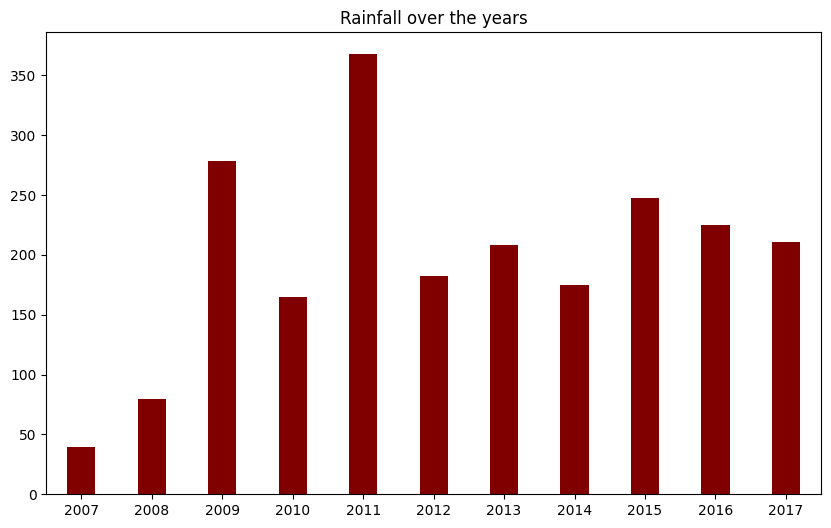

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df.year, df.Rainfall, color = 'maroon', width = 0.4)
plt.xlim(2007-0.5, 2017+0.5)

plt.xticks(np.arange(2007, 2018, 1))

plt.title('Rainfall over the years')
plt.show()

# 가장 많은 강우량을 기록한 위치

In [ ]:
max_rainfall = df['Rainfall'].max()
df[df['Rainfall'] == max_rainfall][['Location', 'Rainfall', 'year', 'month']]

,Location,Rainfall,year,month
70689,Darwin,367.6,2011,2


Observation:  

Average Rainfall for the period when data is collected is 2.37 mm  
Darwin experience is highest amount of Rainfall in 2nd month of 2011 which recorded as 367.6 mm  
Data shows highest Rainfall occured in 2011 followed by 2009 and 2015.  

# Getting info from Sunshine column

In [ ]:
df.Sunshine.nunique()

146

In [ ]:
df.Sunshine.describe()

,Sunshine
count,72866.000000
mean,7.874997
std,3.505031
min,0.000000
25%,5.900000
50%,8.600000
75%,10.400000
max,14.500000


# 햇빛이 비추는 최대시간을 기록한 위치

In [ ]:
max_sunshine = df['Sunshine'].max()
df.loc[df['Sunshine'] == max_sunshine][['Location', 'Sunshine', 'year', 'month']].sort_values(ascending=False, by = 'Location')

,Location,Sunshine,year,month
34322,Mildura,14.5,2015,12


# Top ten Location with maximum hours of Sunshine

In [ ]:
df.groupby(['Location', 'year', 'month'])['Sunshine'].max().reset_index().sort_values(ascending=False, by = 'Sunshine').head(10)

,Location,year,month,Sunshine
1079,Mildura,2015,12,14.5
1210,MountGambier,2010,1,14.3
1430,Nuriootpa,2011,12,14.3
1711,Portland,2010,1,14.3
2469,Woomera,2009,1,14.2
733,Hobart,2010,11,14.2
1429,Nuriootpa,2011,11,14.1
2240,WaggaWagga,2014,12,14.1
1488,Nuriootpa,2016,12,14.1
1266,MountGambier,2014,12,14.1


# Location with min hours of Sunshine

In [ ]:
df.groupby(['Location', 'year', 'month'])['Sunshine'].min().sort_values(ascending=True)

Location       year  month
AliceSprings   2009  8         0.0
                     6         0.0
                     5         0.0
Woomera        2017  3         0.0
NorfolkIsland  2013  6         0.0
                              ... 
AliceSprings   2017  1        10.6
                     2        10.6
               2016  6        10.6
                     5        10.6
                     10       10.6
Name: Sunshine, Length: 2568, dtype: float64

# 관측결과:
- 고유값 146개
- 선샤인 최장시간은 2015년 12월 Mildrua에서 14.5시간 (생각해보니 남반구네)
- 관측된 선샤인 평균 시간은 7.87시간 그리고 50퍼센트가 넘는 지역이 8시간 이상의 선샤인을 기록함 (중위값)
-

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

# Clound9am 컬럼에서 정보 얻기

In [ ]:
df.Cloud9am.unique()

array([2. , 1. , 8. , 3. , 0. , 4. , 7. , 5. , 6. , 4.5, 9. ])

In [ ]:
df.Cloud9am.value_counts()

,count
Cloud9am,
7.0,16776
1.0,13027
6.0,8757
8.0,8320
0.0,6317
2.0,5881
3.0,4936
5.0,4853
4.0,3458


In [ ]:
df.Cloud9am.describe()

,Cloud9am
count,72866.000000
mean,4.345881
std,2.777711
min,0.000000
25%,1.000000
50%,5.000000
75%,7.000000
max,9.000000


# city in Location column with highest cloud9am oktas in the whole year

In [ ]:
df.groupby(['Location', 'year', 'month'])['Cloud9am'].max().reset_index().sort_values(ascending=False, by='Cloud9am').head(100)

,Location,year,month,Cloud9am
351,Canberra,2012,5,9.0
1391,NorfolkIsland,2017,2,8.0
1390,NorfolkIsland,2017,1,8.0
1389,NorfolkIsland,2016,12,8.0
1388,NorfolkIsland,2016,11,8.0
...,...,...,...,...
1306,NorfolkIsland,2009,10,8.0
1351,NorfolkIsland,2013,10,8.0
1348,NorfolkIsland,2013,7,8.0
2227,WaggaWagga,2013,11,8.0


# city in Location column with lowest cloud9am oktas in the whole year

In [ ]:
df.loc[df['Cloud9am'].idxmin(), ['Location', 'Cloud9am','year','month']]

,10
Location,Cobar
Cloud9am,0.0
year,2009
month,1


# pandas `idxmin()` / `idxmax()` 함수 정리

## 📚 개요
- `idxmin()`과 `idxmax()`는 각각 **최소값**과 **최대값**을 가지는 **인덱스를 반환하는 함수**

## 🛠 주요 특징
- Series나 DataFrame 열에 사용 가능.
- 실제 "값"이 아니라 "값을 가진 인덱스"를 반환.
- 값이 동일하게 여러 개일 경우, 가장 첫 번째 인덱스를 반환.
- 결측치(NaN)는 무시하고 계산.

==> Cloud9am 컬럼에서 가장 값이 작은 행의 인덱스를 반환하고 그 인덱스의 행에서 'Location', 'Cloud9am', 'year', 'month' 컬럼만 추출

In [ ]:
max_cloud9am_row = df.loc[df['Cloud9am'].idxmax()]
print(max_cloud9am_row['Location'])

Canberra


# 관측결과:  
- cloud9am 컬럼은 0부터 9까지 고유값이 11개 존재 (4.5 포함)
- 0은 구름 한 점 없음 9는 하늘이 구름으로 뒤덮인 상태  
- 평균 cloud9am는 4.34이고 50%의 지역이 5 okats를 기록  
- 캔버라는 데이터셋에서 유일하게 9 oktas를 기록한 도시  

# 데이터 전처리

In [ ]:
df.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


# 박스플롯을 사용하여 이상치 확인

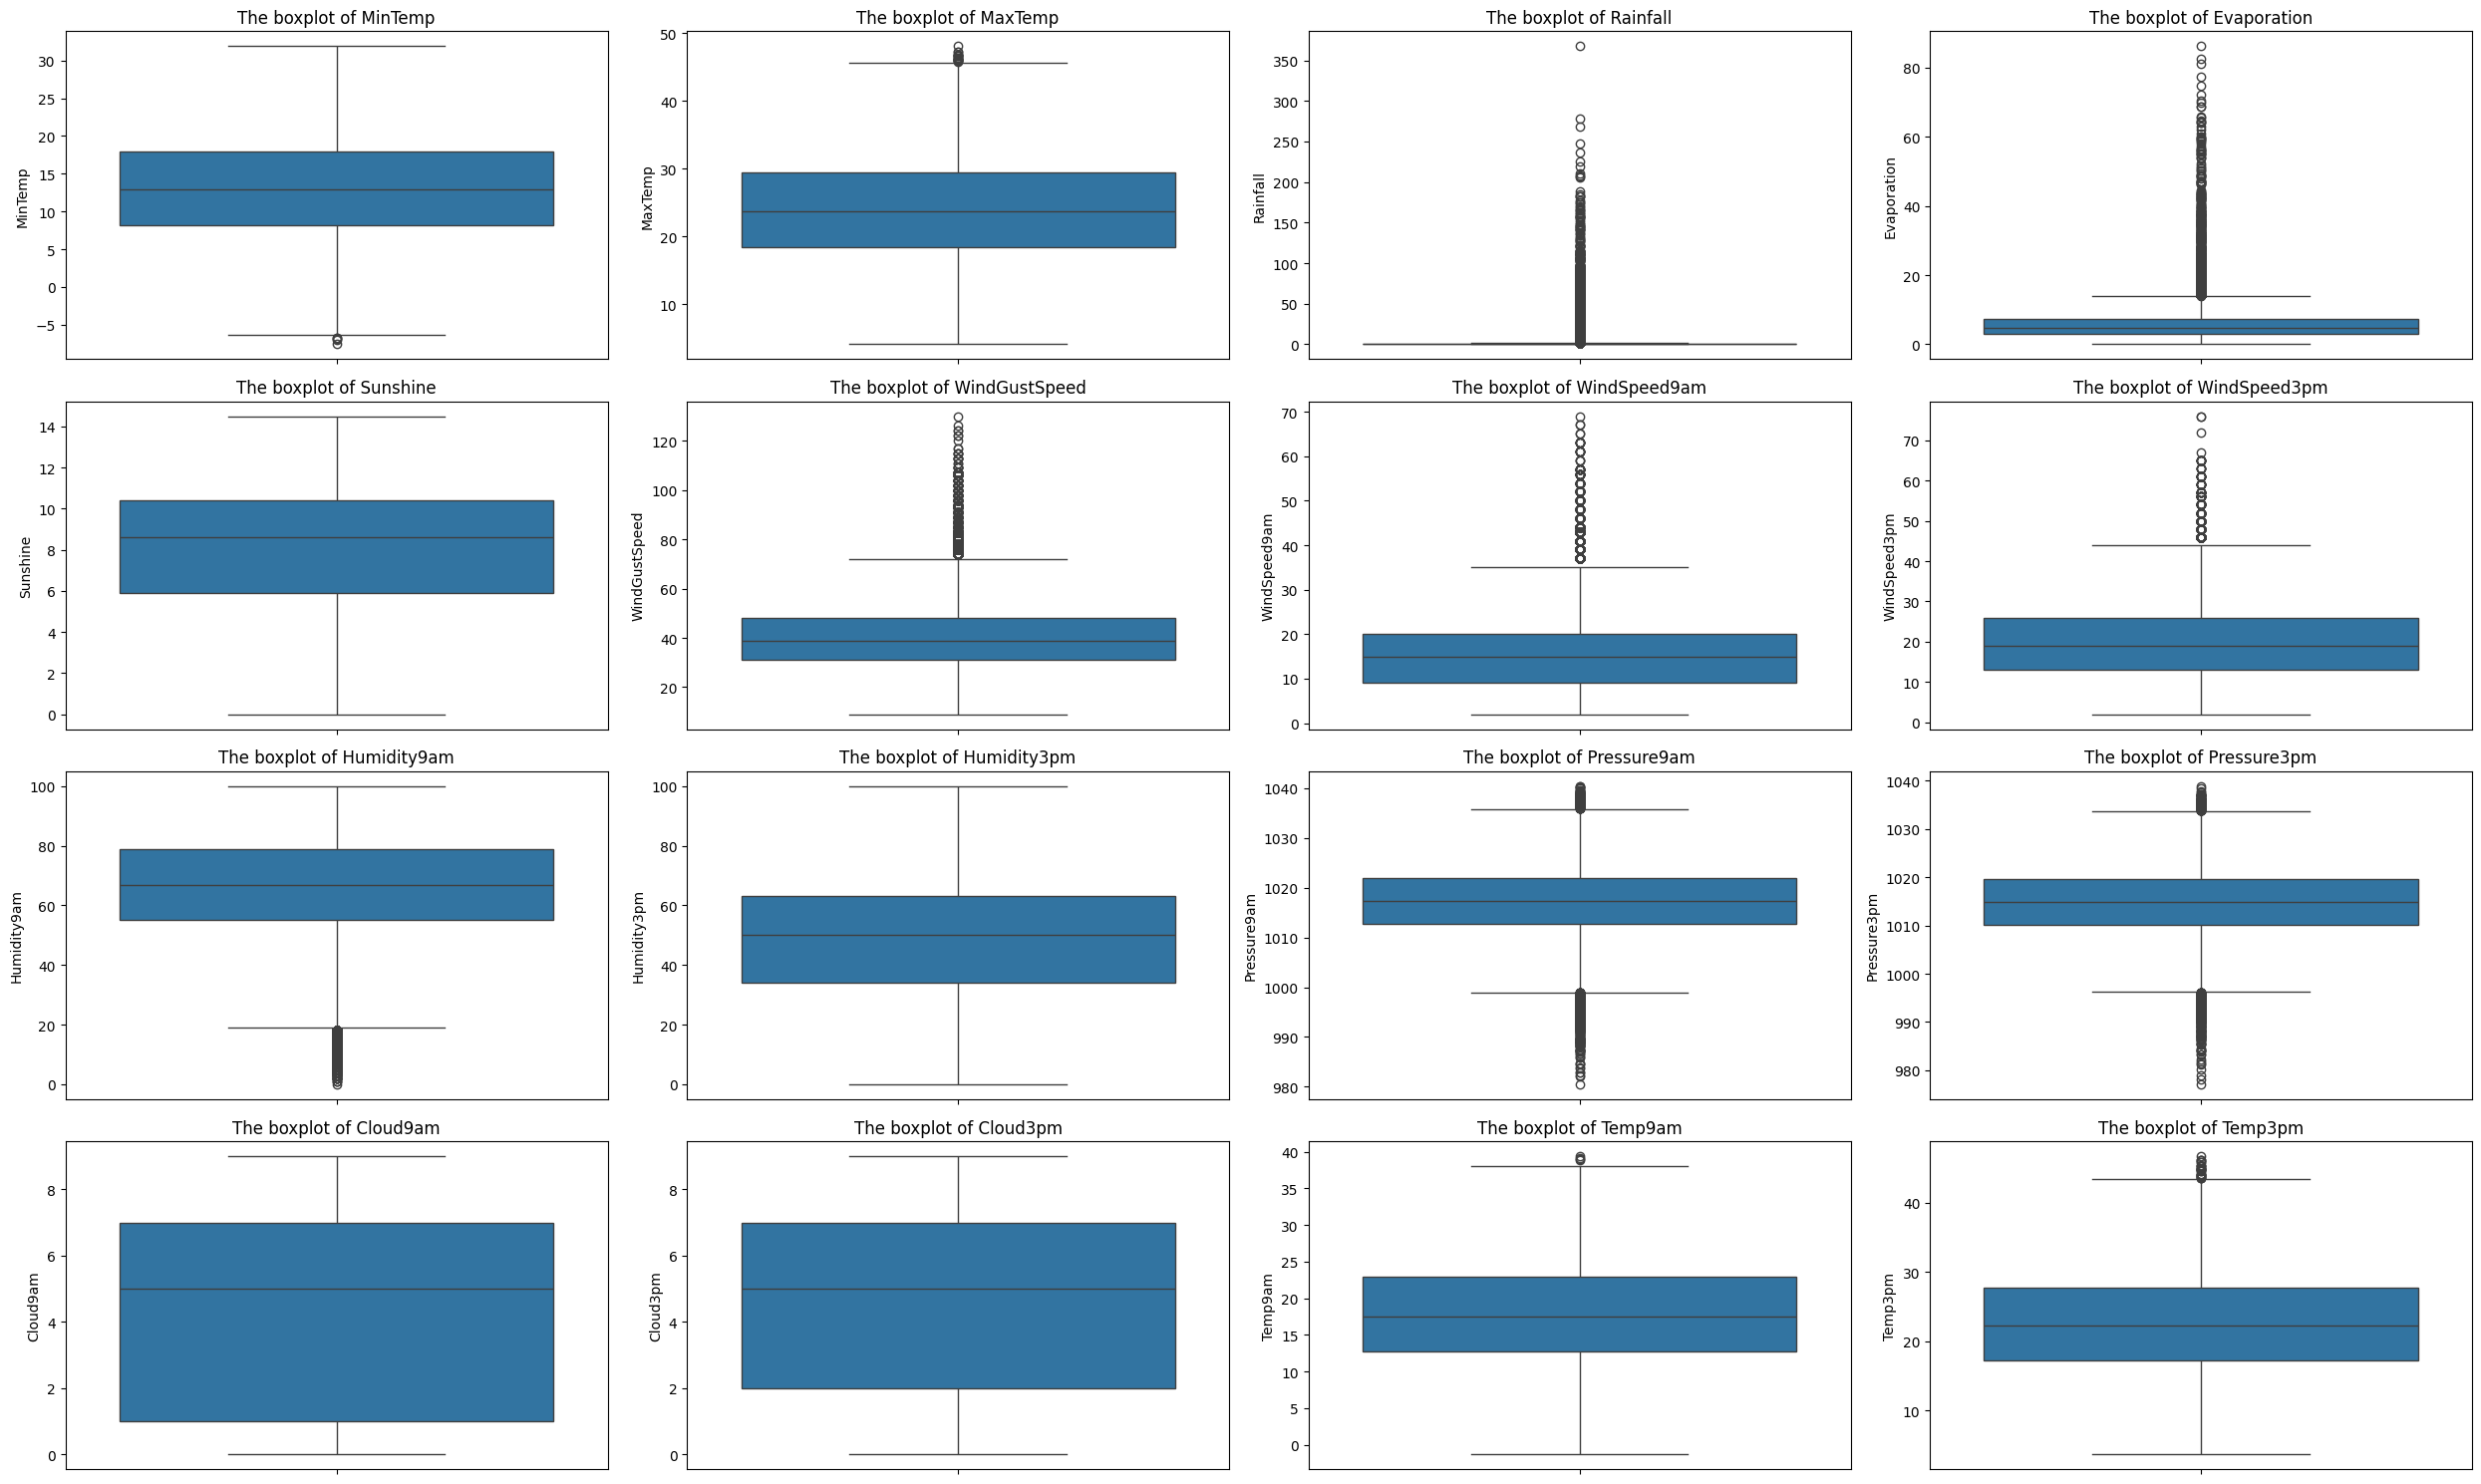

In [ ]:
numeric_cols = df.select_dtypes(exclude = ['object', 'int32']).columns # 날짜 컬럼은 이상치라 할게 없으니 제외한듯

plt.figure(figsize= (25, 15))

for column in range(len(numeric_cols)):
  plt.subplot(4,4, column+1)
  sns.boxplot(y=df[numeric_cols[column]])
  plt.title(f'The boxplot of {numeric_cols[column]}')
plt.tight_layout()
plt.show()

## ~ 칼럼들에서 관측치 발견했다. IQR방식으로 처리하겠다

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

In [ ]:
col = ['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am', 'Temp9am', 'Temp3pm']

for i in col:
  print(f'{i}: {df[i].dtype}')

MaxTemp: float64
Rainfall: float64
Evaporation: float64
WindGustSpeed: float64
WindSpeed9am: float64
WindSpeed3pm: float64
Humidity9am: float64
Pressure3pm: float64
Pressure9am: float64
Temp9am: float64
Temp3pm: float64


## iqr방식을 사용하여 이상치들을 중위값으로 대체 (삭제가 아니라 대체하네)

In [ ]:
for i in col:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr
  median = df[i].median()

  df[i] = np.where((df[i] < lower_limit) | (df[i] > upper_limit), median, df[i])

## np.where

**np.where**는 NumPy에서 조건에 따라 값을 선택하거나, 조건을 만족하는 인덱스를 반환할 때 사용하는 함수.

### 기본 사용법
```python
np.where(condition, x, y)
```
- `condition`: 조건 (Boolean 배열)
- `x`: 조건이 `True`일 때 선택할 값
- `y`: 조건이 `False`일 때 선택할 값

## 박스플롯으로 결과 확인

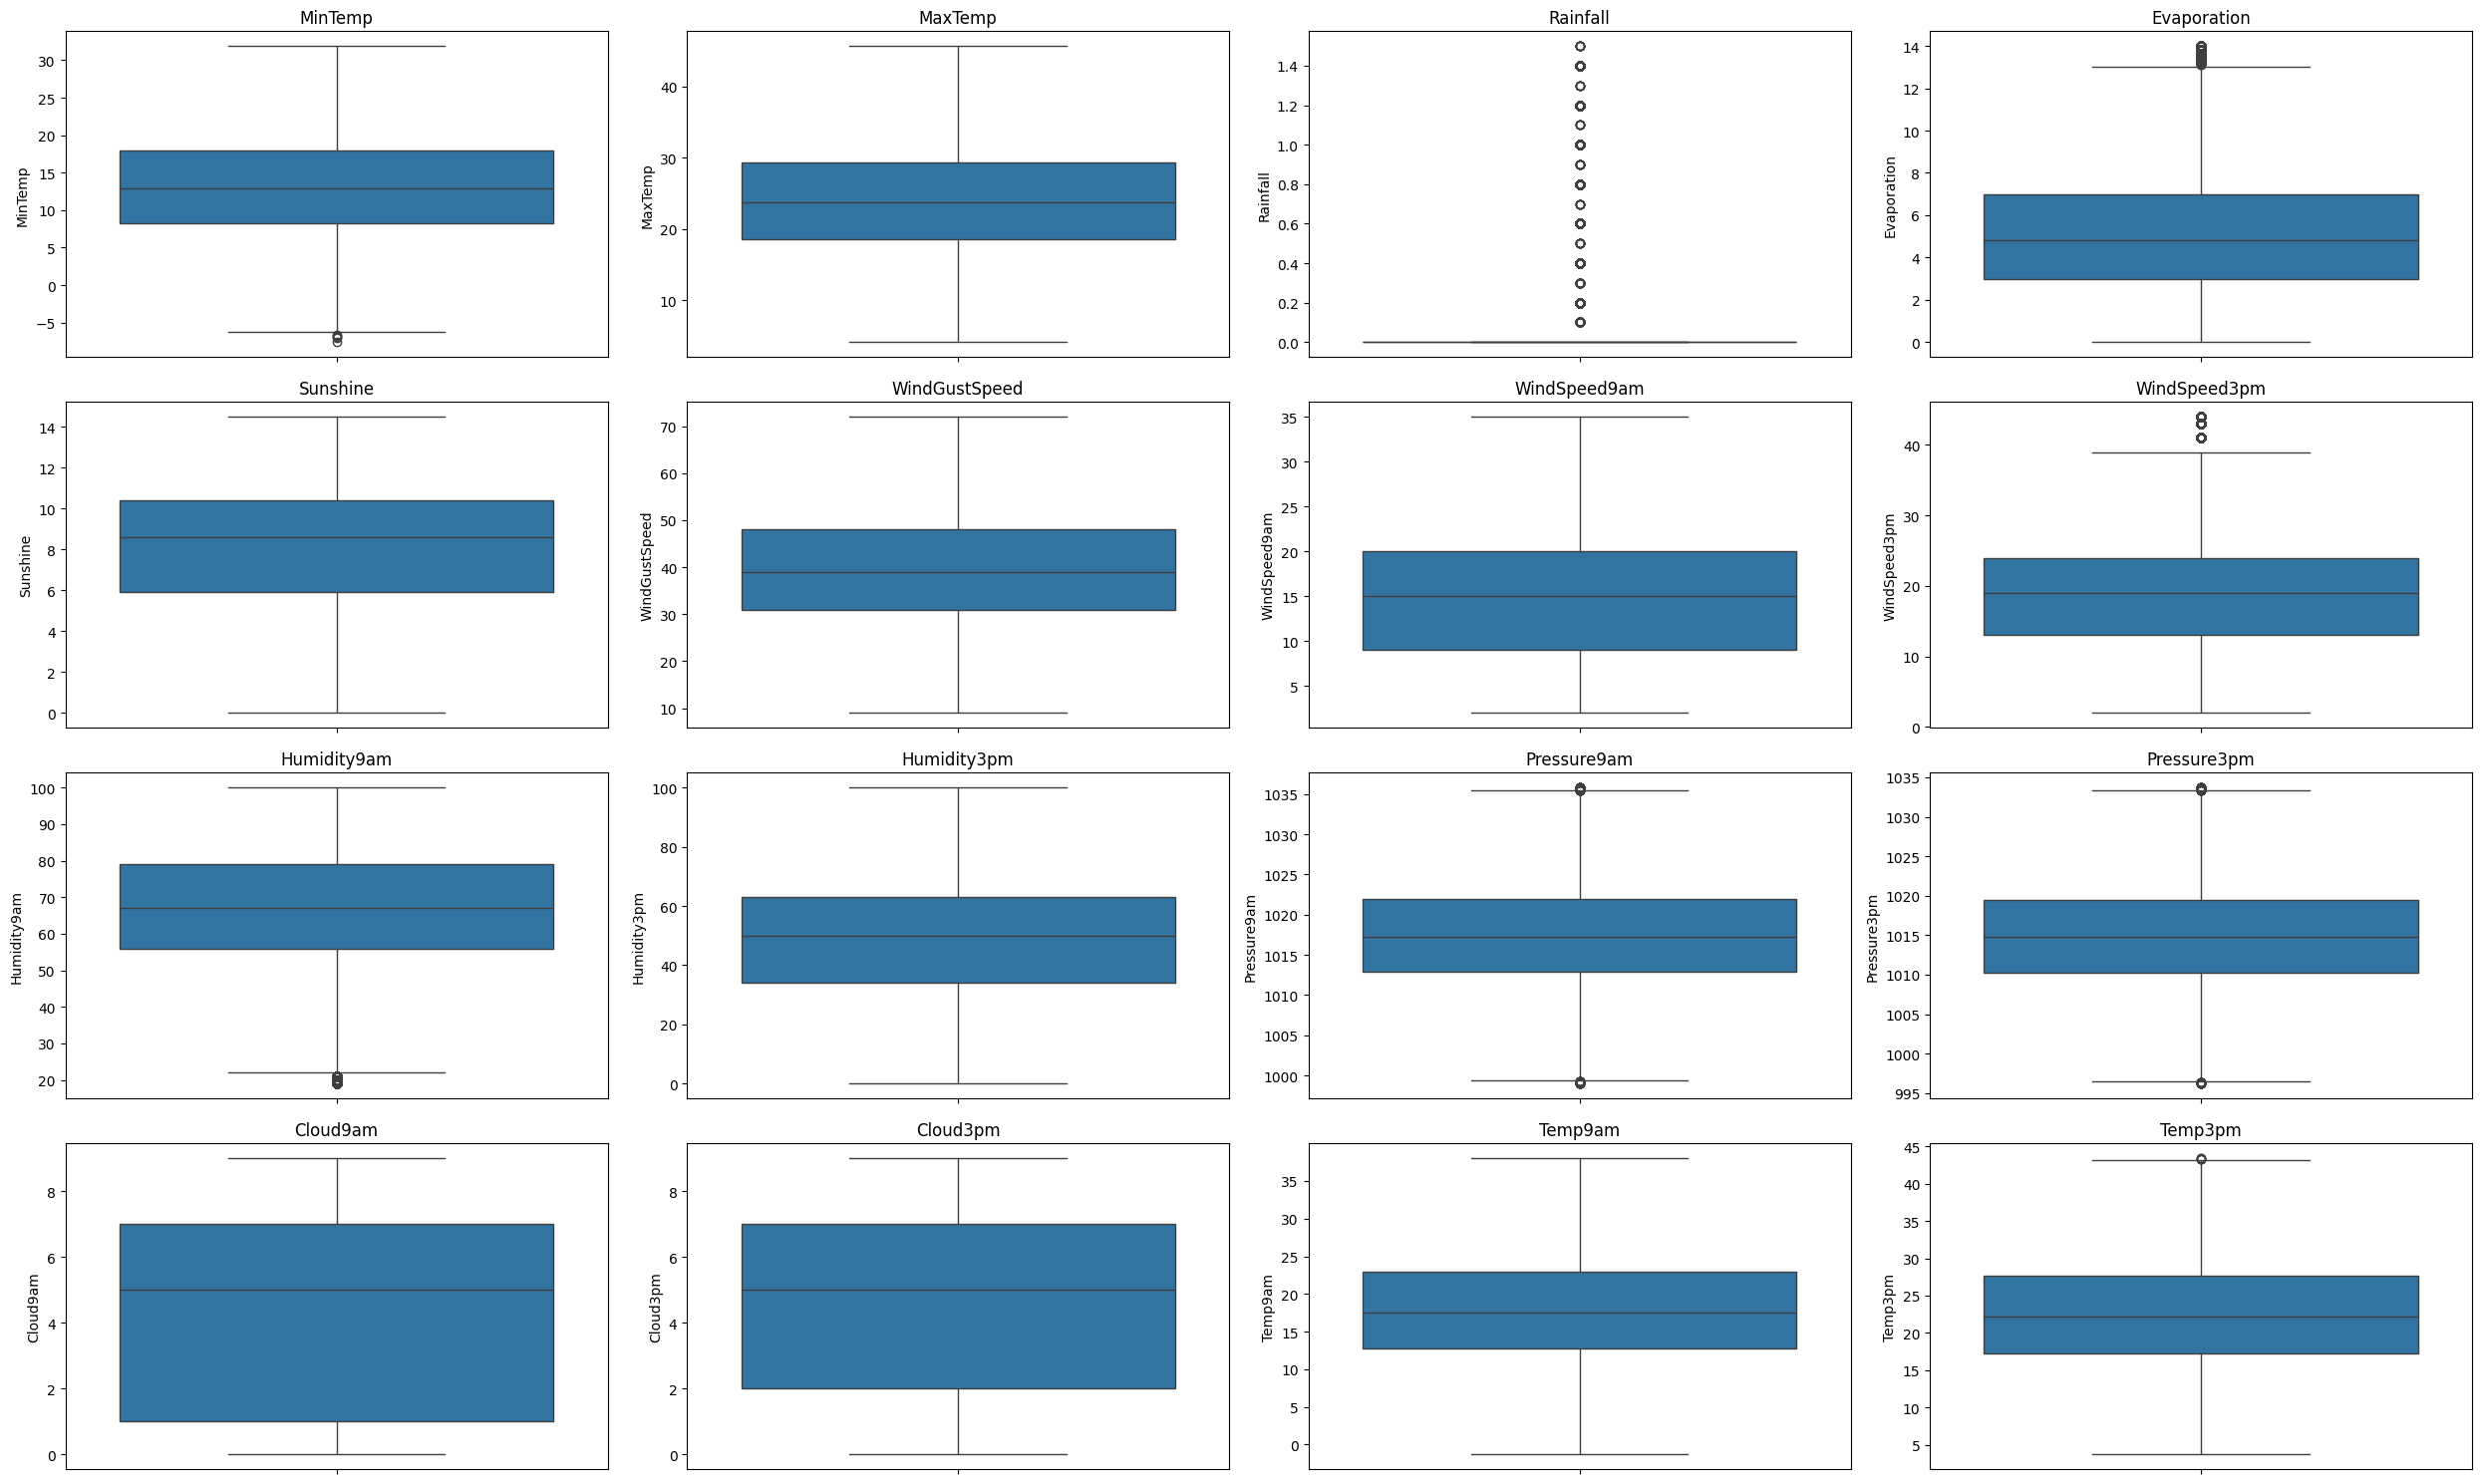

In [ ]:
numeric_cols = df.select_dtypes(exclude = ['object', 'int32']).columns

plt.figure(figsize=(25, 15))

for col in range(len(numeric_cols)):
  plt.subplot(4, 4, col+1)
  sns.boxplot(y=df[numeric_cols[col]])
  plt.title(numeric_cols[col])

plt.tight_layout()
plt.show()

In [ ]:
df.select_dtypes(exclude=['object', 'int32']).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000,72866.000000
mean,13.125480,24.057813,0.082995,5.133703,7.874997,39.840666,15.206598,19.566314,66.785044,49.226704,1017.455560,1014.973635,4.345881,4.440768,17.919883,22.553253
std,6.464502,7.005620,0.248914,2.935353,3.505031,11.552586,7.363924,8.132229,17.474984,20.494372,6.616313,6.634035,2.777711,2.586848,6.554191,6.859507
min,-7.600000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,19.000000,0.000000,999.000000,996.200000,0.000000,0.000000,-1.300000,3.700000
25%,8.200000,18.500000,0.000000,3.000000,5.900000,31.000000,9.000000,13.000000,56.000000,34.000000,1012.900000,1010.300000,1.000000,2.000000,12.800000,17.200000
50%,12.900000,23.700000,0.000000,4.800000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.300000,1014.800000,5.000000,5.000000,17.500000,22.200000
75%,18.000000,29.400000,0.000000,7.000000,10.400000,48.000000,20.000000,24.000000,79.000000,63.000000,1021.900000,1019.500000,7.000000,7.000000,22.900000,27.600000
max,31.900000,45.700000,1.500000,14.000000,14.500000,72.000000,35.000000,44.000000,100.000000,100.000000,1035.800000,1033.700000,9.000000,9.000000,38.000000,43.400000


### 이상치가 중위값으로 대체함.강우량, 오후 3시 풍속, 증발량과 같은 몇몇 컬럼들은 여전히 극단값들이 존재

# 히스토그램으로 수치형 변수들 분포 확인

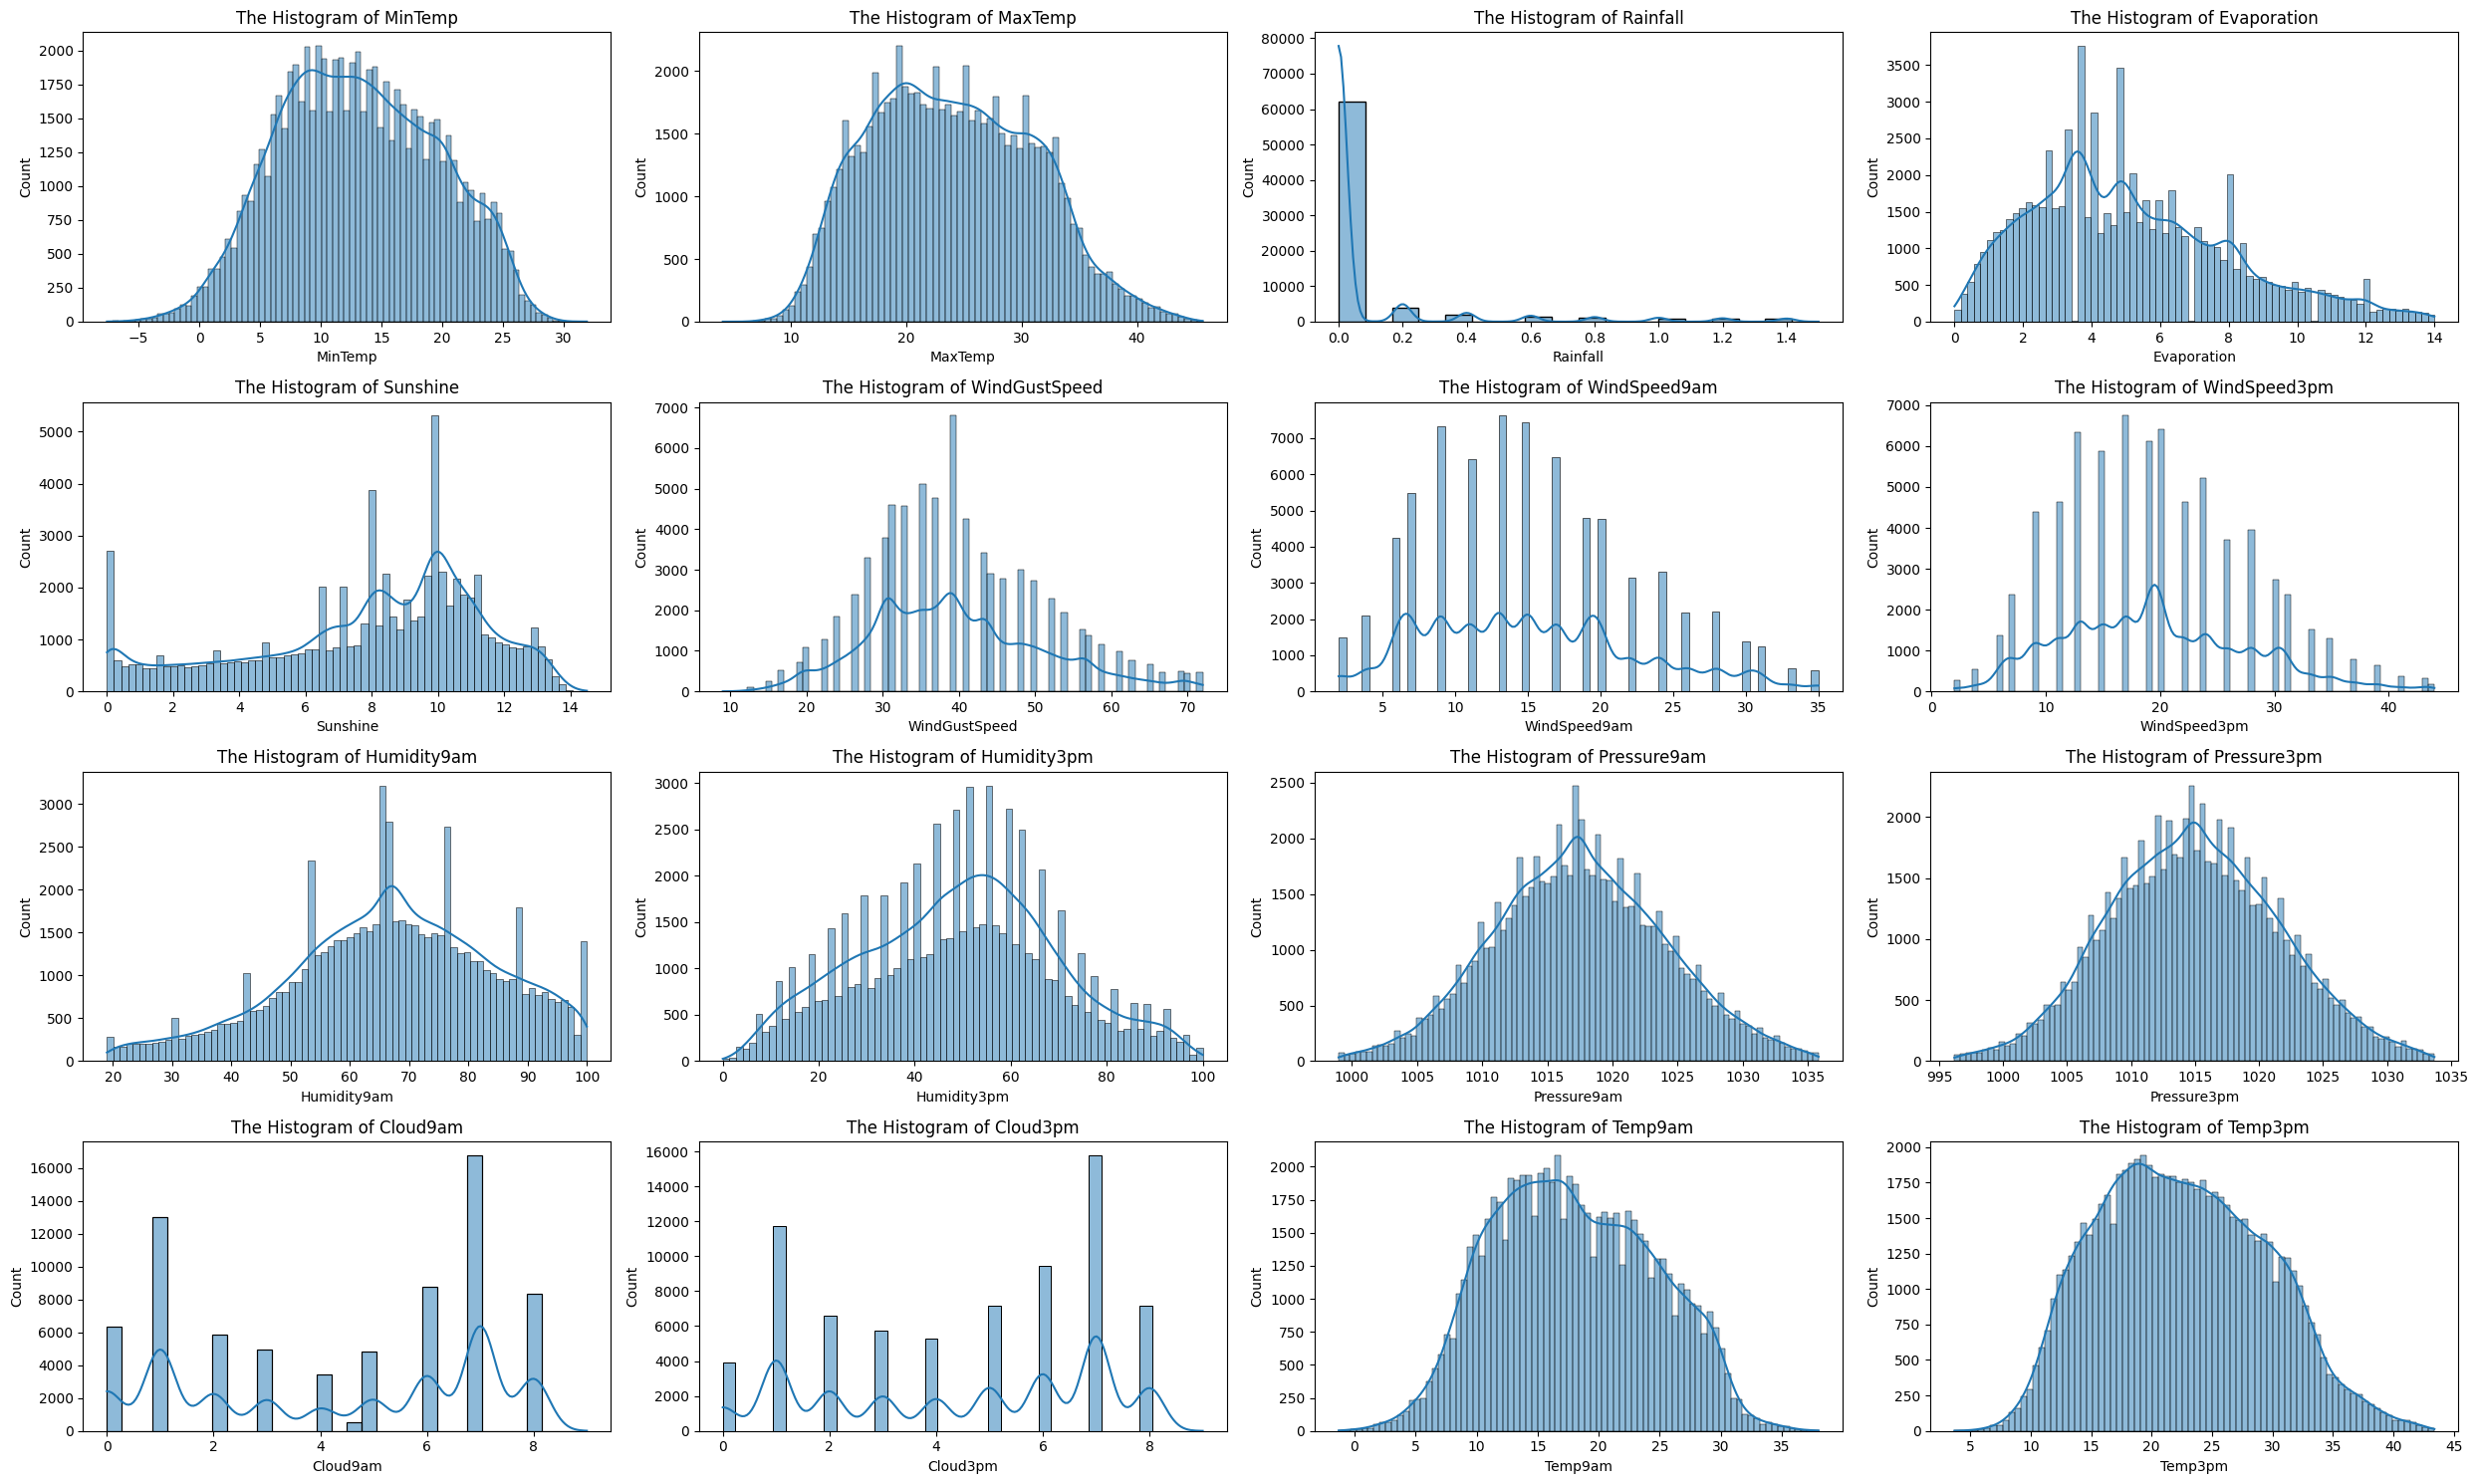

In [ ]:
numeric_cols = df.select_dtypes(exclude = ['object', 'int32']).columns
plt.figure(figsize=(25, 15))

for column in range(len(numeric_cols)):
  plt.subplot(4, 4, column + 1)  # 4행 4열 격자 중에서 (column + 1)번째 칸에 그래프를 그림 (subplot은 1번부터 시작하므로 +1 필요)
  sns.histplot(x=df[numeric_cols[column]], kde =True)
  plt.title(f'The Histogram of {numeric_cols[column]}')

plt.tight_layout()
plt.show()

## 수치형 변수 표준화

In [ ]:
sc_col = df.select_dtypes(include= 'float64').columns
sc_col = sc_col.drop(['Rainfall', 'Cloud9am', 'Cloud3pm'])

sc = StandardScaler()

for col in sc_col:
  df[col] = sc.fit_transform(df[[col]])

## 위의 3가지 칼럼은 이미 값이 작기 때문에 표준화에서 제외한 듯하다

# 다시 히스토그램으로 표준화된 결과 확인

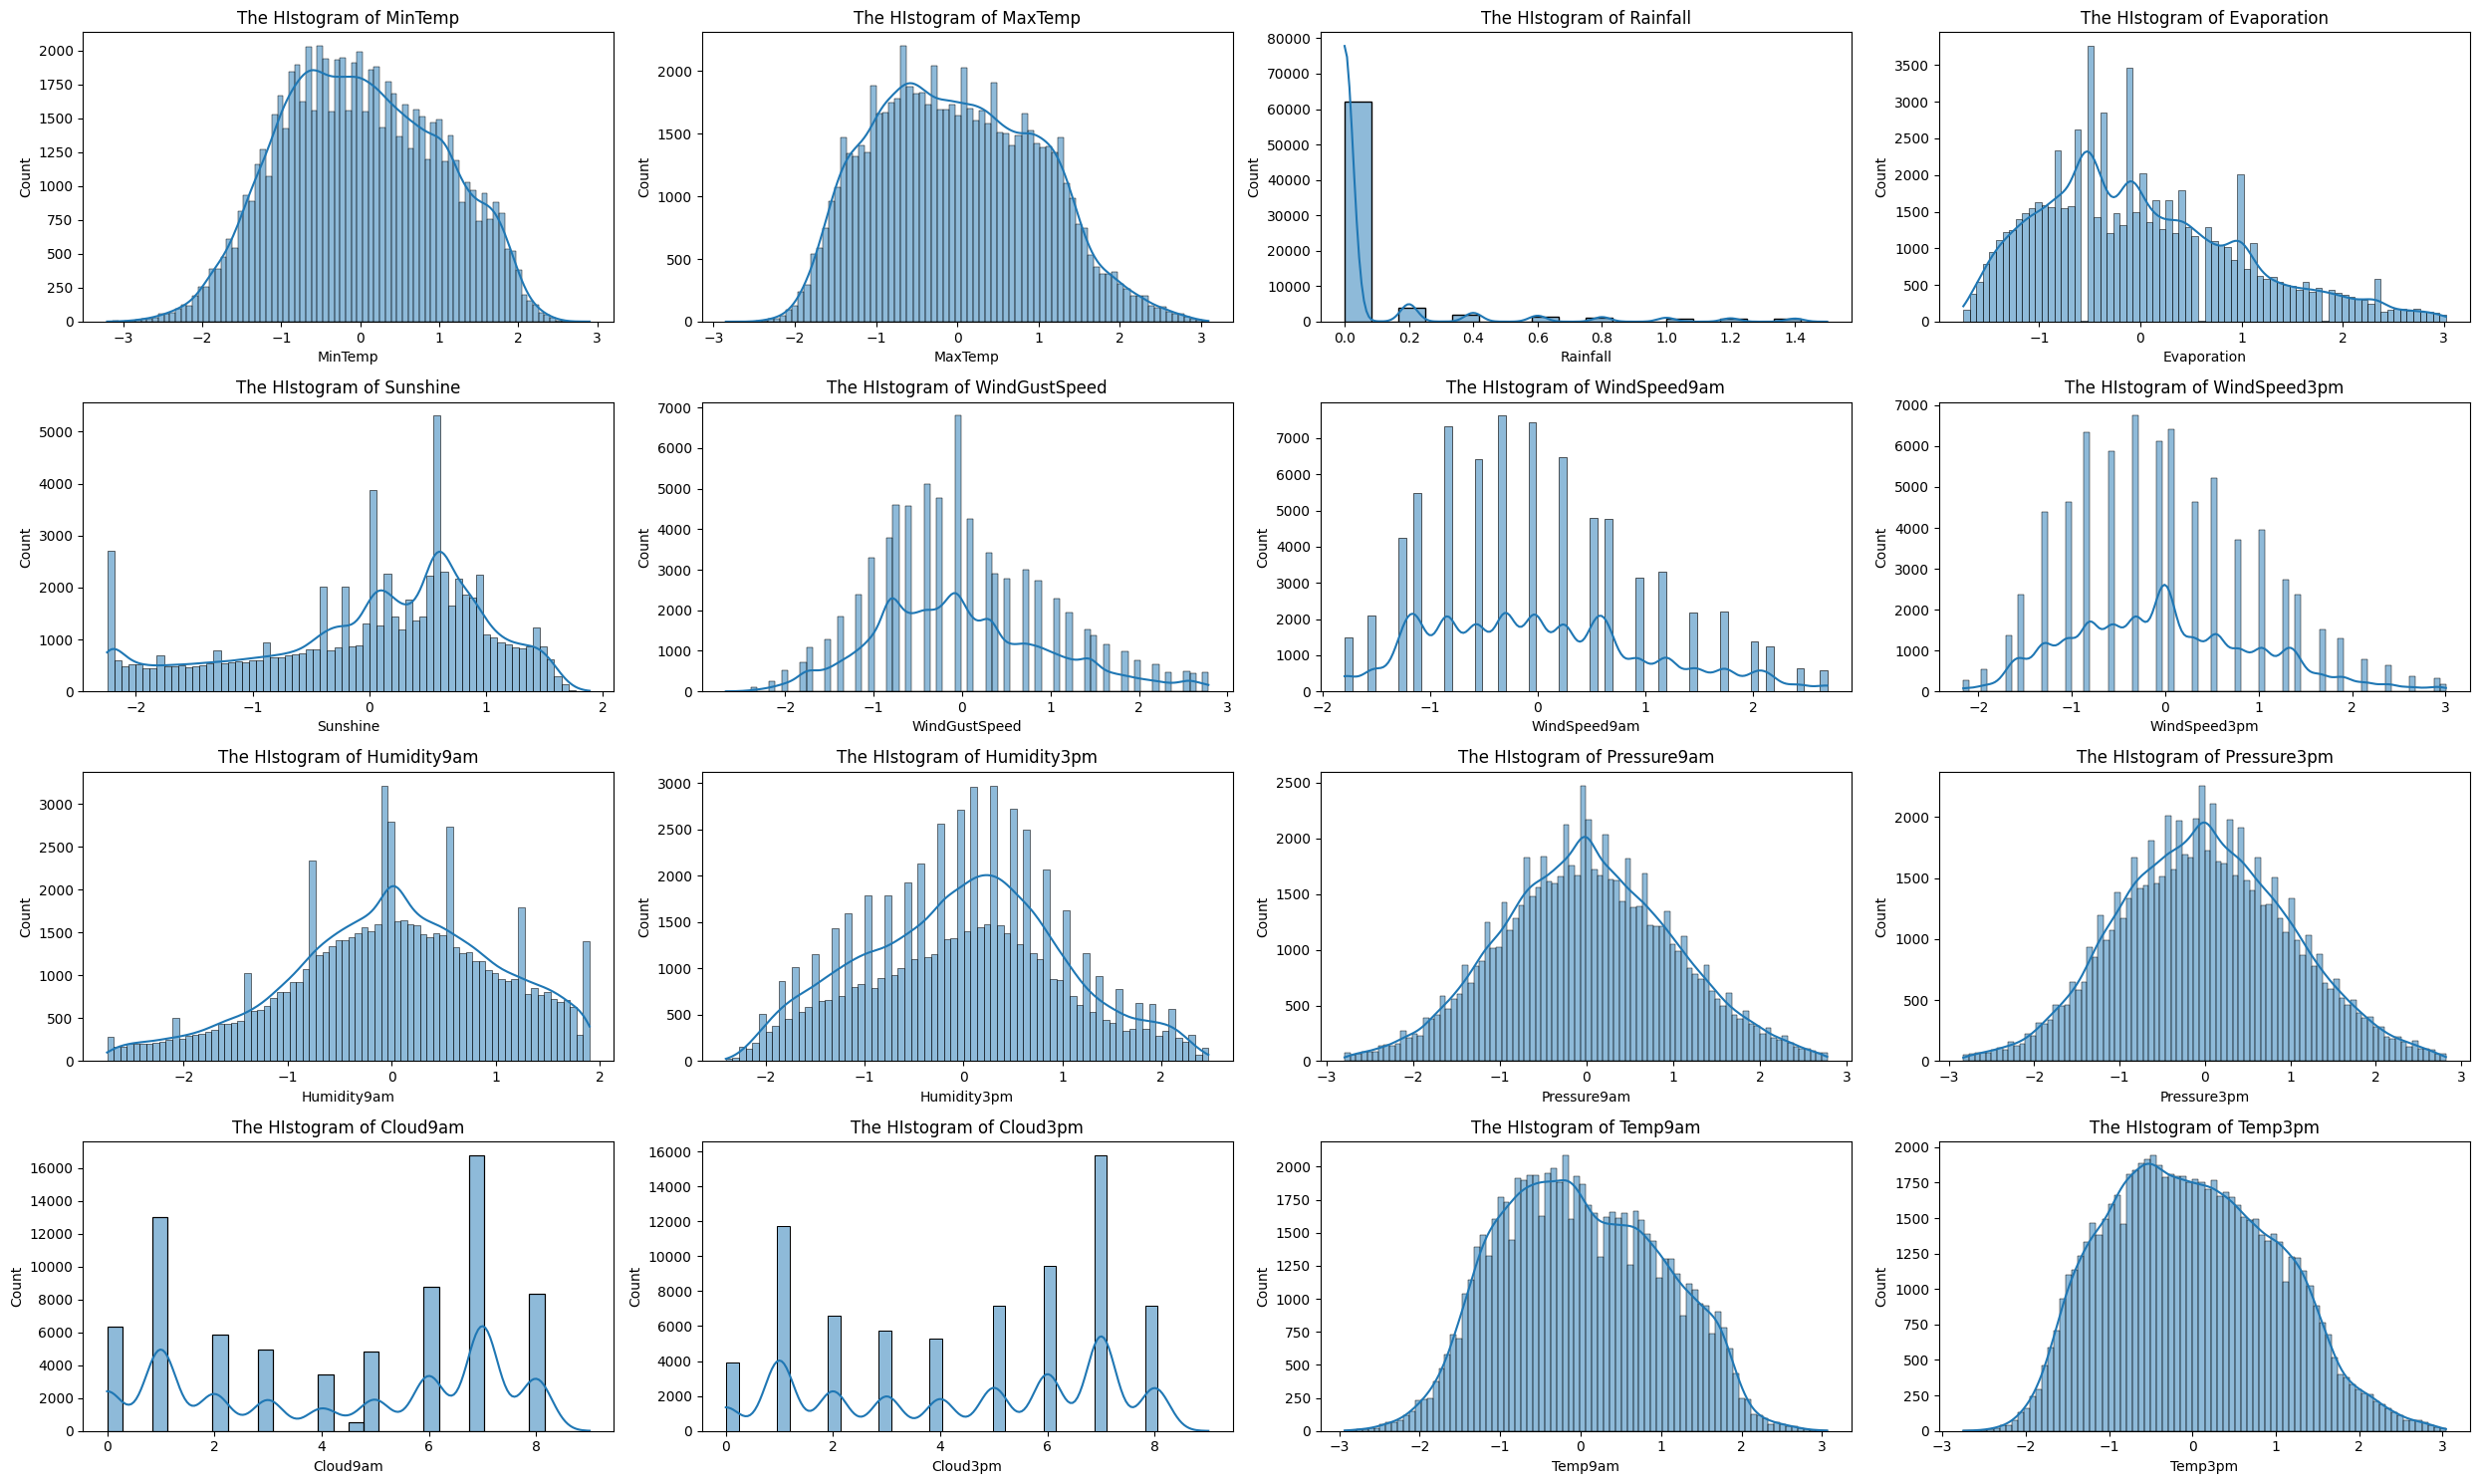

In [ ]:
cols = df.select_dtypes(include = 'float64').columns

plt.figure(figsize = (25, 15))

for col in range(len(cols)):
  plt.subplot(4,4, col+1)
  sns.histplot(x = df[cols[col]], kde = True)
  plt.title(f'The HIstogram of {cols[col]}')

plt.tight_layout()
plt.show()

In [ ]:
object_col = df.select_dtypes(include = 'object').columns
le = LabelEncoder()
for col in object_col:
  df[col] = le.fit_transform(df[col])

## 이 필자는 원핫이 아니라 레이블 인코딩을 사용함. 그런데 object 타입의 컬럼들은 명목형 변수로 서로 간에 순위가 없음 그리고 이 사람은 모델링을 로지스틱회귀, xgboost, 랜포를 쓰는데 이 중에서 로지스틱은 선형모델기반이라 영향을 받는 것으로 알고있는데..

In [ ]:
object_col

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 대상 컬럼
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
target = 'RainTomorrow'

# 결과 저장용
results = []

# 각 컬럼에 대해 카이제곱 검정 수행
for col in cols:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'변수': col, '카이제곱 통계량': chi2, 'p-value': p})

# 결과 출력
result_df = pd.DataFrame(results)
print(result_df)


            변수     카이제곱 통계량        p-value
0     Location  2295.069798   0.000000e+00
1  WindGustDir   780.819937  1.064463e-156
2   WindDir9am  1054.437668  2.870483e-215
3   WindDir3pm   693.582921  4.333983e-138
4    RainToday  7040.511398   0.000000e+00


# 로지스틱회귀 분류기에 대한 설명 (난 내가 정리한걸로 ㅋ)

[링크 텍스트]()https://github.com/ksb7762-k/Codeit/blob/main/%EA%B8%B0%EB%B3%B8_%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EB%93%A4/04-1.%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.md)

# 데이터프레임 간단히 살피기

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
0,4,0.738580,1.590475,0.0,2.339189,1.262481,11,0.706283,1,12,-1.250239,0.053330,-2.677277,-1.767654,-1.686080,-1.593858,2.0,5.0,1.324370,1.581283,0,0,1,1,2009
1,4,0.815926,0.691191,0.0,-0.113685,1.462195,8,-0.245892,10,10,0.515137,-0.069639,-2.105026,-2.011625,-0.688539,-0.433169,1.0,1.0,0.363147,0.648265,0,0,2,1,2009
2,4,0.970618,1.933059,0.0,1.930376,0.777460,5,0.533160,5,6,2.008916,-0.561512,-1.418325,-1.328506,-0.779225,-0.870311,1.0,6.0,1.644778,1.799959,0,0,4,1,2009
3,4,1.357348,2.047254,0.0,2.134782,1.233950,14,-0.765260,14,15,-1.250239,-1.668227,-1.704451,-1.328506,-0.718768,-0.885385,1.0,5.0,1.705808,1.902008,0,0,5,1,2009
4,4,1.713140,2.418387,0.0,2.066647,0.149787,14,-0.419014,7,14,0.243541,-0.807449,-2.734502,-1.670065,-1.021053,-1.141641,1.0,6.0,2.392397,2.193576,0,0,6,1,2009


# 머신러닝모델 추정

In [ ]:
df.dtypes

,0
Location,int64
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,int64
WindGustSpeed,float64
WindDir9am,int64
WindDir3pm,int64


# 날짜 (day, month, year) 제외하고 수치형 변수들의 상관계수 파악  

==>  이걸 왜 모델링 단계에서 하는거지? 적어도 피쳐 엔지니어링 단계에서 해야했던거 아닌가?

In [ ]:
df.select_dtypes(include = 'float64').corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.747428,-0.028466,0.502211,0.068989,0.162461,0.142306,0.142237,-0.171101,0.056903,-0.494136,-0.505096,0.077343,0.021482,0.904884,0.724463
MaxTemp,0.747428,1.000000,-0.145347,0.628416,0.432810,0.078328,0.014058,0.017592,-0.451842,-0.455919,-0.373121,-0.461986,-0.269778,-0.258888,0.890480,0.984148
Rainfall,-0.028466,-0.145347,1.000000,-0.129446,-0.128354,0.016053,0.015902,0.031847,0.146244,0.152682,0.004641,0.036427,0.123679,0.112726,-0.091295,-0.148338
Evaporation,0.502211,0.628416,-0.129446,1.000000,0.372133,0.189318,0.161161,0.120132,-0.494693,-0.386829,-0.285367,-0.316479,-0.215346,-0.222712,0.588859,0.611349
Sunshine,0.068989,0.432810,-0.128354,0.372133,1.000000,-0.030182,0.009935,0.023598,-0.463031,-0.591986,0.037649,-0.020626,-0.615989,-0.627766,0.267044,0.453494
WindGustSpeed,0.162461,0.078328,0.016053,0.189318,-0.030182,1.000000,0.523185,0.639585,-0.184740,-0.046319,-0.378371,-0.335624,0.072952,0.101891,0.130395,0.045126
WindSpeed9am,0.142306,0.014058,0.015902,0.161161,0.009935,0.523185,1.000000,0.421474,-0.215874,-0.054919,-0.169492,-0.130421,0.011775,0.035049,0.082457,0.004403
WindSpeed3pm,0.142237,0.017592,0.031847,0.120132,0.023598,0.639585,0.421474,1.000000,-0.091871,0.043984,-0.270087,-0.231557,0.071149,0.036305,0.122629,-0.003326
Humidity9am,-0.171101,-0.451842,0.146244,-0.494693,-0.463031,-0.184740,-0.215874,-0.091871,1.000000,0.646192,0.107796,0.155931,0.431514,0.341095,-0.388181,-0.443842
Humidity3pm,0.056903,-0.455919,0.152682,-0.386829,-0.591986,-0.046319,-0.054919,0.043984,0.646192,1.000000,-0.050329,0.031548,0.507036,0.499948,-0.161558,-0.503017


# 히트맵

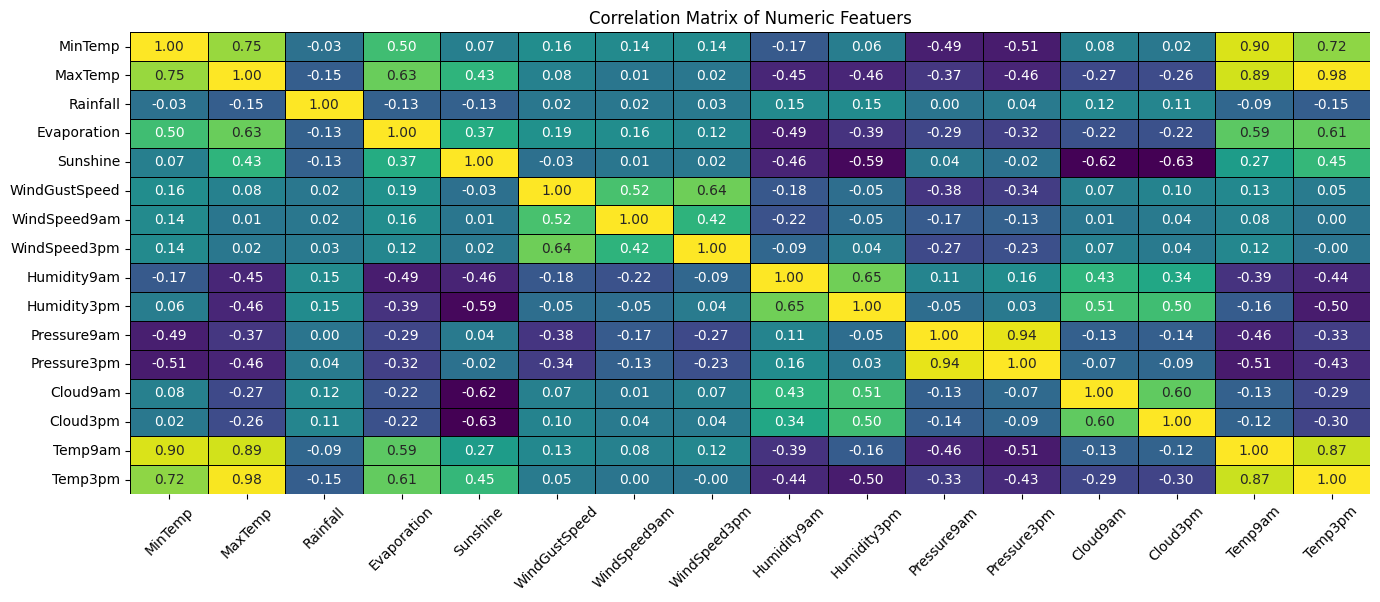

In [ ]:
corr_matrix = df.select_dtypes(include = 'float64').corr()
plt.figure(figsize  = (16,6))
sns.heatmap(corr_matrix, cbar=False, cmap = 'viridis', annot=True, fmt = '.2f', linewidths = 0.5, linecolor = 'black')
plt.xticks(rotation=45)
plt.title('Correlation Matrix of Numeric Featuers')
plt.show()

## day month year 컬럼은 끝까지 안쓰는 모양이다.  month 정도는 분석 더 할만하지 않았을까 싶다  
 아래는 내가 추가해봄

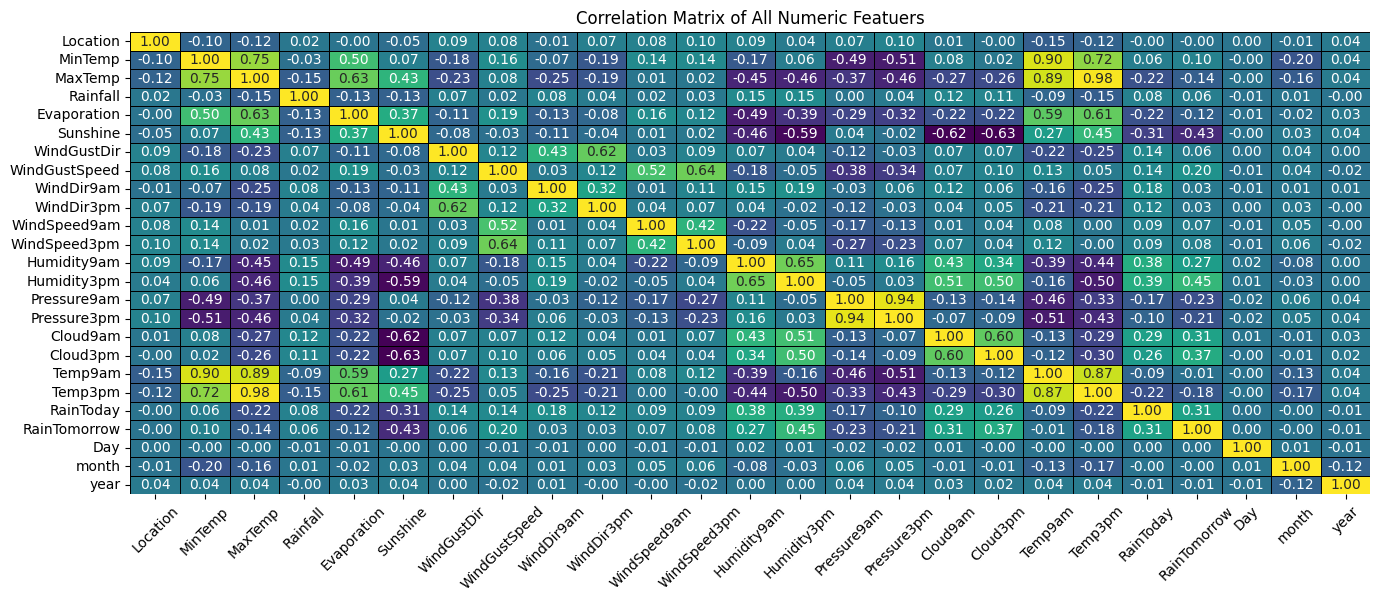

In [ ]:
matrix = df.corr()
plt.figure(figsize  = (16,6))
sns.heatmap(matrix, cbar=False, cmap = 'viridis', annot=True, fmt = '.2f', linewidths = 0.5, linecolor = 'black')
plt.xticks(rotation=45)
plt.title('Correlation Matrix of All Numeric Featuers')
plt.show()

# 높은 상관계수를 가진 피쳐들의 히트맵

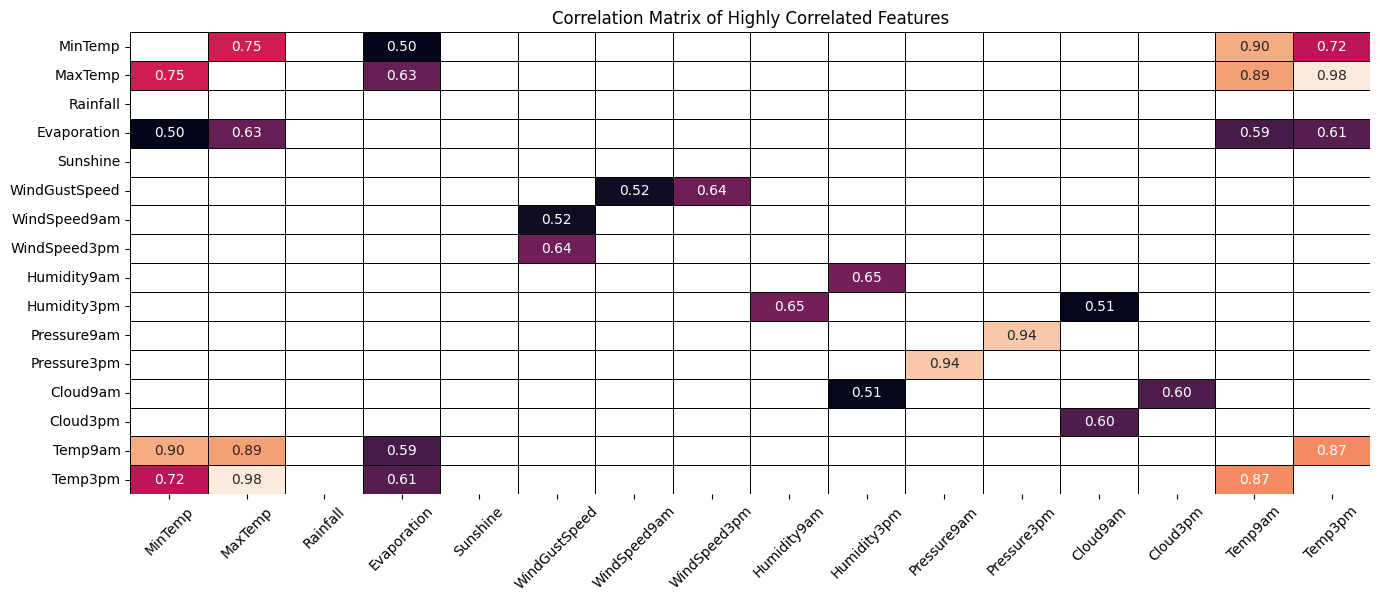

In [ ]:
plt.figure(figsize=(16,6))
corr = df.select_dtypes(include = 'float64').corr()
sns.heatmap(corr[(corr>0.5) & (corr<0.99)], cbar =False, annot = True, fmt = '.2f', linewidths=0.5, linecolor = 'black')
plt.xticks(rotation=45)
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()

## 관측결과:
MinTemp와 MaxTemp 같은 일부 열은 Temp9am 및 Temp3pm과 매우 높은 양의 상관관계를 보임  

하루 중 시간대에 따라 MinTemp는 거의 Temp9am과 같고, 오후에는 기온이 상승하여 Temp3pm이 MaxTemp와 거의 같기 때문  

그래서 이 변수들 간에는 매우 높은 양의 상관관계가 나타나는 것  


마찬가지로, Pressure9am과 Pressure3pm도 높은 양의 상관관계를 보임  

그 이유는 한 지역의 대기압은 하루 동안 거의 비슷하게 유지되기 때문  


##  다중공선성 확인

In [ ]:
col = df.select_dtypes(include = 'float64').columns
vif = [variance_inflation_factor(df[col].values, i) for i in range(len(col))] # 위에서 미리 import함
col = col # 왜 쓴지 모름
vif = pd.DataFrame({'column' : col, 'vif':vif})
vif.round(2)

,column,vif
0,MinTemp,9.32
1,MaxTemp,42.30
2,Rainfall,1.15
3,Evaporation,1.96
4,Sunshine,1.87
5,WindGustSpeed,2.24
6,WindSpeed9am,1.55
7,WindSpeed3pm,1.85
8,Humidity9am,2.93
9,Humidity3pm,5.27


## 관측결과:
**다중공선성(Multicollinearity)**은 모델 내에서 두 개 이상의 예측 변수들이 서로 높은 상관관계를 가질 때 발생하는 현상  


예를 들어, MaxTemp와 Temp3pm은 서로 매우 높은 상관관계를 가지며, 분산 팽창 지수(VIF) 값도 높음  
  .

마찬가지로, Pressure9am과 Pressure3pm 역시 높은 상관관계를 가지며, VIF 값 또한 높음  


따라서, 이러한 변수들 중 하나를 제거함으로써 다중공선성을 피할 수 있음  


# 타겟변수의 클래스 불균형 처리 (Oversampling)

RainTomorrow의 분포 확인

In [ ]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,57161
1,15705


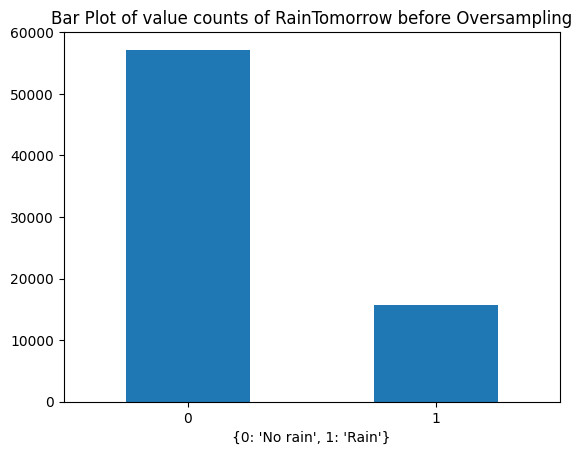

In [ ]:
df['RainTomorrow'].value_counts().plot(kind='bar')
plt.title('Bar Plot of value counts of RainTomorrow before Oversampling')
plt.xticks(rotation = 360)
plt.xlabel({0: 'No rain', 1 : 'Rain'})
plt.show()

## Observations:
원본 데이터셋이 심하게 불균형함  
대부분의 항목이 비가 안 오는 경우임  
이 상태로 예측 모델을 만들면 오류가 많고 과적합 가능성 높음  
모델이 비가 안 온다고 가정해버릴 수 있음  
하지만 우리는 모델이 비 징후를 포착하길 바람  

타깃 변수에 클래스 불균형 존재  
RainTomorrow가 0인 경우(No)가 57161개  
RainTomorrow가 1인 경우(Yes)가 15705개  
극심한 불균형 상태임  

이 문제를 해결하기 위해 SMOTE 같은 오버샘플링 기법 사용 가능  


## SMOTE를 사용한 Oversampling

In [ ]:
X_resample = df.drop('RainTomorrow', axis = 1)
y_resample = df['RainTomorrow']

X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample, y_resample, test_size = 0.2, random_state = 42)
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train_resample, y_train_resample)


## SMOTE에 관하여







# Oversampling 이후 RainTomorrow의 개수

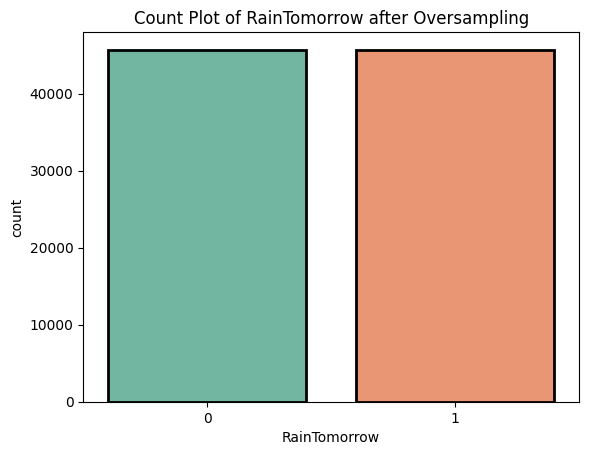

In [ ]:
sns.countplot(x=y_train_resample, palette = 'Set2', edgecolor = 'black', linewidth = 2)
plt.title('Count Plot of RainTomorrow after Oversampling')
plt.show()

# ---------------------------------------------------------------------------

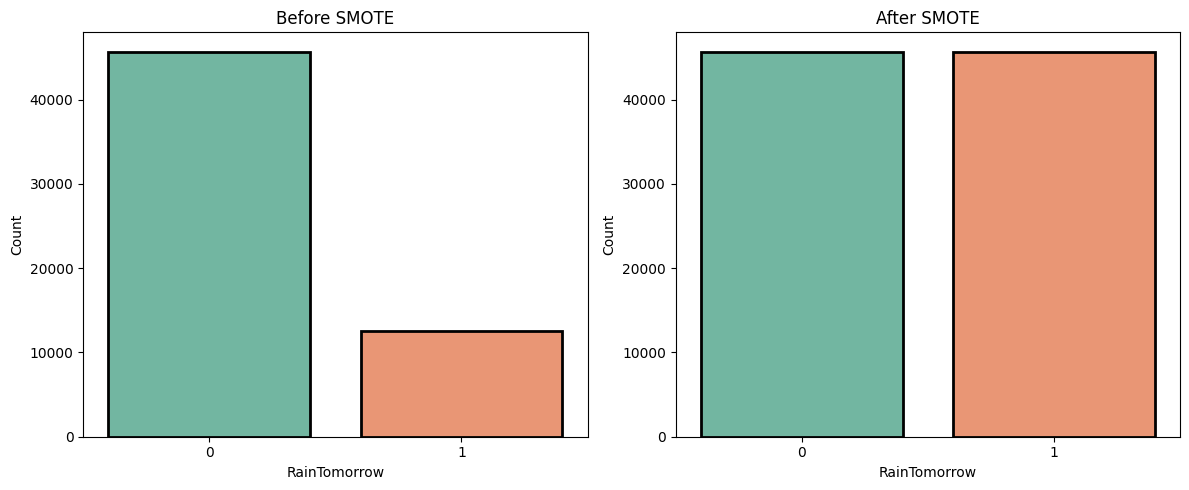

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 원본 데이터 분리
X_resample = df.drop('RainTomorrow', axis=1)
y_resample = df['RainTomorrow']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SMOTE 전
sns.countplot(x=y_train, palette='Set2', edgecolor='black', linewidth=2, ax=axes[0])
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('RainTomorrow')
axes[0].set_ylabel('Count')

# SMOTE 후
sns.countplot(x=y_train_smote, palette='Set2', edgecolor='black', linewidth=2, ax=axes[1])
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('RainTomorrow')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


✅ **정리: SMOTE 작동 방식**

- `y`는 직접 보간하지 않음.  
  → 대신, 새로 생성된 `X`는 **소수 클래스(minority class)** 데이터를 기반으로 만들어지므로  
  → 해당 샘플의 `y`는 자동으로 **`y = 1`**로 지정됨.

- `X`의 각 변수(feature)는 **소수 클래스의 이웃 샘플들과 선형 보간(interpolation)**을 통해 생성됨.  
  → 예: `A + λ * (B - A)` 형식으로 새로운 데이터를 만듦

- SMOTE는 **소수 클래스에 대해서만** 새로운 `X` 샘플을 생성함.  
  → 다수 클래스는 건드리지 않음

## 🔸 SMOTE와 클래스 경계 모호화

### ✅ 문제 상황: SMOTE는 왜 클래스 경계를 "섞는다"고 할까?

SMOTE는 소수 클래스(예: `1`)의 샘플들 사이에서 새로운 데이터를 **직선 보간(interpolation)** 방식으로 생성.

예:
1. 소수 클래스 샘플 A를 선택
2. A의 이웃 B를 선택 (둘 다 클래스 1)
3. A와 B 사이 중간 위치 C에 새로운 샘플 생성
4. → C는 **클래스 1로 라벨링**

---

### ❗ 그런데 문제가 생기는 경우

- A와 B가 실제로는 **클래스 0 근처(경계 영역)**에 위치한 소수 클래스 샘플이었다면,
- 중간에 생성된 C도 자연스럽게 **클래스 0의 특징 공간에 가깝게 위치**할 수 있음
- 하지만 C는 무조건 클래스 1로 라벨링되므로,
  → 모델이 **"0처럼 생긴 1"**을 학습하게 됨

---

### 📌 결과적으로 생기는 현상

- 모델은 0과 1 클래스의 경계를 **정확하게 학습하지 못함**
- 경계가 흐려져서 **잘못된 예측**이 늘어날 수 있음
- 특히 테스트셋에서 **경계 근처 샘플 분류 정확도 저하** 가능

---


## insights after oversampling ( 여기서 전후 차이 보여주네요 ㅎㅎ)






In [ ]:
before_sampling = X_resample.shape[0]
print(f'Number of rows before SMOTE: {before_sampling}')
after_sampling = X_train_resample.shape[0] + X_test_resample.shape[0]
print(f'Number of rows after SMOTE: {after_sampling}')

increase_in_rows = after_sampling - before_sampling
print(f'Increase in number of rows after SMOTE: {increase_in_rows}')

Number of rows before SMOTE: 72866
Number of rows after SMOTE: 106004
Increase in number of rows after SMOTE: 33138


# 머신러닝에 사용할 피쳐와 타겟 정의

In [ ]:
X1 = X_train_resample.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'], axis = 1)
X2 = X_test_resample.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'], axis = 1)

X = pd.concat([X1, X2], axis = 0)

y1= y_train_resample
y2 = y_test_resample

y = pd.concat([y1, y2], axis = 0)

In [ ]:
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'Day', 'month',
       'year'],
      dtype='object')

In [ ]:
y.name

'RainTomorrow'

## 로지스틱 회귀 모델링하기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 로지스틱 회귀모델 훈련시키기

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가

In [ ]:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Precision Score :', precision_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred))
print('Classification Report :', '\n',classification_report(y_test, y_pred))

Accuracy Score : 0.7923211169284468
Recall Score: 0.7788637751985339
Precision Score : 0.7742131363222345
F1 Score : 0.7765314926660914
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     11379
           1       0.77      0.78      0.78      9822

    accuracy                           0.79     21201
   macro avg       0.79      0.79      0.79     21201
weighted avg       0.79      0.79      0.79     21201



# Heatmap of Confusion Matrix Logistic Regressor

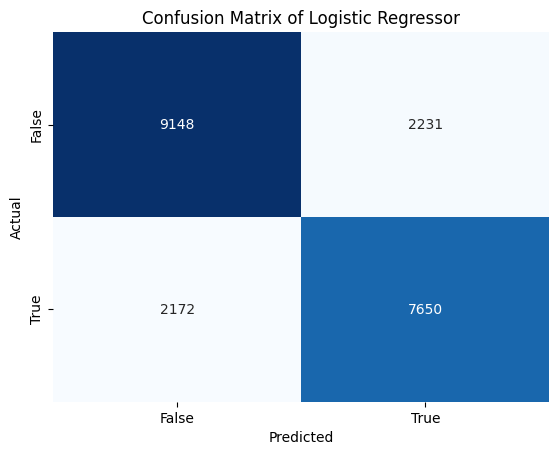

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False', 'True'],  # 예측값 기준
            yticklabels=['False', 'True'],  # 실제값 기준
            cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regressor')
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.785608999681615


In [ ]:
y_pred_test = model.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.7923211169284468


### 트레이닝셋과 테스트셋의 정확도가 거의 일치 ==> 과적합 방지했다

# 랜포 모델링

In [ ]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Day,month,year
0,20,-0.375202,0.177314,0.0,-0.249956,0.920113,5,0.706283,3,4,0.515137,1.037077,-0.617175,-0.450210,-0.915253,0.0,1.0,0,23,9,2012
1,24,-0.777402,0.734014,0.0,0.363263,1.205419,0,-0.419014,7,6,-0.299652,-1.053385,0.584551,-1.035740,0.928687,0.0,1.0,0,20,10,2009
2,1,-0.266918,0.006022,0.0,-0.795039,0.064195,1,-1.977118,15,1,-1.250239,-1.668227,0.699002,0.379292,0.611287,6.0,2.0,0,22,8,2012
3,0,1.156249,2.532582,0.0,-0.113685,1.462195,0,-0.245892,0,1,1.194127,-1.545259,0.012301,-1.865242,-1.595395,0.0,0.0,0,24,1,2013
4,10,-1.380701,-0.750519,0.0,-0.113685,0.577746,13,-0.851821,12,15,-0.571248,-0.315575,0.870677,-0.840564,1.956457,0.0,0.0,0,24,8,2014


In [ ]:
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'Day', 'month',
       'year'],
      dtype='object')

# 랜포 분류기 훈련시키기

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

## 랜포 분류기 평가

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred), '\n')
print('Recall Score: ', recall_score(y_test, y_pred), '\n')
print('Precision Score: ', precision_score(y_test, y_pred), '\n')
print('F1 Score :', f1_score(y_test, y_pred), '\n')

Accuracy Score:  0.9033064478090657 

Recall Score:  0.8898391366320505 

Precision Score:  0.900288421920066 

F1 Score : 0.8950332821300563 



# ✅ 한 줄 암기법
“예측이 맞으면 T(True), 틀리면 F(False)” + “양성이라고 예측했는지(P) 음성이라고 예측했는지(N)”



# 헷갈리네..

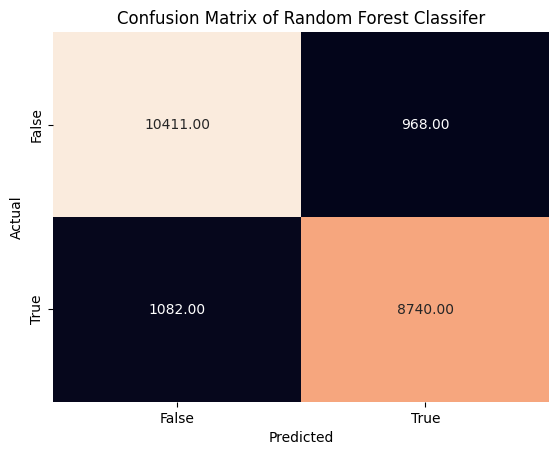

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt= '.2f',
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'],
            cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix of Random Forest Classifer')
plt.show()


In [ ]:
y_pred_train = rf.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9999882079643408


In [ ]:
y_pred_test = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.9033064478090657


## 평가 해석
랜덤 포레스트 분류기의 정확도(Accuracy)는 0.90으로, 로지스틱 회귀 모델에 비해 상대적으로 훨씬 높은 수치를 보임  
  

그러나 훈련 세트와 테스트 세트의 정확도를 각각 따로 분석해본 결과,
랜덤 포레스트 분류기는 **훈련 데이터에 과적합(overfitting)**되고 있다는 것을 알 수 있음  

즉, 모델이 훈련 데이터의 잡음(noise)까지 모두 학습해버린 것으로 보임

# 랜포 분류기 하이퍼 파라미터 튜닝

In [ ]:
model = RandomForestClassifier(
    n_estimators = 150,
    max_depth = 10,
    min_samples_split = 10,
    min_samples_leaf = 5,
    max_features = 5,
    criterion = 'entropy',
    random_state = 42
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Test accruacy: {accuracy_score(y_test, y_pred_test)}')

Train accuracy: 0.8666674528023772
Test accruacy: 0.8565633696523749


(과적화가 해소되었긴 하지만 성능이 튜닝 전보다 떨어짐 ==> GridSearchCV 공부해서 그거 써보려고 했는데 실행 너무 오래걸려서 포기)

### ✅ 위에서 처음보는 하이퍼파라미터 설명

- `min_samples_split = 10`  
  하나의 노드를 분할하기 위해 필요한 최소 샘플 수를 10으로 설정함  
  → 샘플 수가 10개 미만이면 해당 노드는 더 이상 분할되지 않음

- `min_samples_leaf = 5`  
  리프 노드(끝노드)에 최소한 5개 이상의 샘플이 있어야 함  
  → 너무 적으면 과적합 위험이 커지므로 이를 방지함

- `max_features = 5`  
  각 노드 분할 시 고려할 최대 feature 수를 5로 제한함  
  → 무작위성을 증가시켜 과적합을 줄이고 모델의 다양성을 확보함

- `criterion = 'entropy'`  
  정보 이득(information gain)을 기준으로 노드를 분할함  
  → 데이터의 불확실성을 줄이기 위한 척도로 사용됨

## XGBoost(Extreme Gradient Boosting) 분류기

### ✅ XGBoost (Extreme Gradient Boosting)

**XGBoost**는 "Extreme Gradient Boosting"의 약자로, Gradient Boosting 알고리즘을 **속도, 성능, 유연성 측면에서 극대화**한 머신러닝 모델이다.  
주로 **분류(Classification)**, **회귀(Regression)**, **랭킹(Learning to Rank)** 문제에 활용되며, **카글(Kaggle)** 등 실전 데이터 대회에서 매우 인기 있다.

---

### 📌 핵심 특징

- **Gradient Boosting 기반**: 이전 모델의 오차(잔차)를 줄이기 위해 새로운 트리를 추가하면서 학습
- **CART 트리 사용**: Classification and Regression Tree를 사용해 복잡한 비선형 분류/회귀를 수행
- **Regularization(정규화)**: L1(Lasso), L2(Ridge) 정규화를 통해 과적합(overfitting)을 효과적으로 방지
- **병렬 처리 지원**: 트리의 분할 지점을 병렬 탐색하여 학습 속도가 매우 빠름
- **조기 종료(Early Stopping)**: 검증 성능이 더 이상 향상되지 않으면 학습을 자동으로 멈춤
- **결측값 자동 처리**: 결측값이 있어도 자동으로 최적 경로를 찾아 분기
- **다양한 손실 함수 지원**: 회귀, 이진 분류, 다중 클래스, 랭킹 문제 등 다양한 목적 함수 사용 가능

---

# 머신러닝 공부를 하면서 경사하강법에 대해 공부했는데 트리기반 모델에서 경사하강법을 쓴다는게 이해가 되지 않았음 그래서 찾아봄


### ✅ 트리와 경사하강법의 관계

- 기본 결정트리(DecisionTreeClassifier/Regressor)에서는 경사하강법을 사용하지 않음
- 그러나 Gradient Boosting 계열(XGBoost, LightGBM 등)은
  - 트리를 쌓는 과정에서 손실 함수의 Gradient(잔차)를 사용함
  - 이 때문에 트리 기반이지만 경사하강법이 핵심 최적화 도구로 쓰임
- 즉, 트리 하나에는 경사하강법이 없고,
  트리들을 연결해나가는 과정에 경사하강법이 존재함

# 문득 떠오른 궁금증: 왜 날짜 컬럼은 삭제 안했지?

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

print('Recall Score: ' , recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred),  '\n')
print('Classification Report : ', '\n', classification_report(y_test, y_pred))

Accuracy Score: 0.9049101457478421
Recall Score:  0.8624516391773569
Precision Score: 0.9272110332749562
F1 Score: 0.8936596687414284 

Classification Report :  
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     11379
           1       0.93      0.86      0.89      9822

    accuracy                           0.90     21201
   macro avg       0.91      0.90      0.90     21201
weighted avg       0.91      0.90      0.90     21201



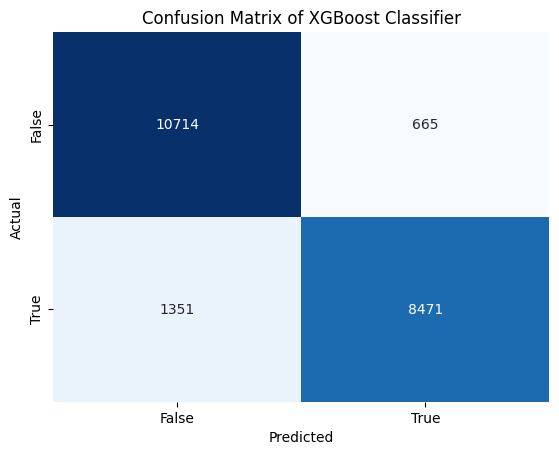

In [ ]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['False', 'True'],  # 예측값 기준
            yticklabels=['False', 'True'],  # 실제값 기준
            cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()

In [ ]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print(f'Train Accuracy Score : {accuracy_score(y_train, y_pred_train):.2f}')

print(f'Test Accuracy Score :{ accuracy_score(y_test, y_pred_test):.2f}')

Train Accuracy Score : 0.93
Test Accuracy Score :0.90


## XGBoost 분류기 해석:

보시다시피, XGBoost 분류기는 좋은 성능을 보이고 있으며, 전체 정확도는 0.93  

훈련 정확도(0.93)와 테스트 정확도(0.90) 사이의 약간의 차이는
모델이 훈련 데이터에 과도하게 치우치지 않고,
보지 못한 새로운 데이터에 대해서도 잘 일반화되고 있음을 시사  

### ✅ "과적합 판단 기준"의 출처

1. **머신러닝 교과서와 실습서**
   - 예: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (Aurélien Géron)
   - 트레인/테스트 간 성능 차이가 **5% 이상이면 과적합 가능성에 주의**하라고 설명함

2. **캐글(Kaggle) 커뮤니티**
   - 다양한 대회에서 상위권 참가자들이 **3~5% 이상 차이**가 날 경우 과적합을 의심
   - 대회 포럼, 커널, 노트북 등에서 반복적으로 언급됨

3. **Scikit-learn 개발자 문서 및 튜토리얼**
   - 명확한 퍼센트 기준은 없지만,
   - **검증 성능이 훈련 성능보다 과도하게 낮으면 과적합**이라고 경고

4. **실제 기업 현장 실무자들**
   - 특히 금융, 의료, 보험 업계 등에서는 **성능 차이 5% 이상**이면 **리스크 요소로 판단**

5. **ML 교육 플랫폼**
   - 예: Coursera, Fast.ai, Udacity 등
   - 모두 **"rule of thumb"** 형태로 유사한 기준을 제시


## Best Model Selection

In [ ]:
result = []
models = {
    'Logistic Regression' : LogisticRegression( random_state = 42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(random_state=42)}

for name, model in models.items():
  start_fit = time.time()

  model.fit(X_train, y_train)
  end_fit = time.time()
  fit_time = end_fit - start_fit

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  result.append((name, acc, precision, recall, fit_time))

result = pd.DataFrame(result, columns = ['Model', 'Accuracy Score', 'Precision', 'Recall', 'Fit Time (s)'])

result


,Model,Accuracy Score,Precision,Recall,Fit Time (s)
0,Logistic Regression,0.792321,0.774213,0.778864,2.994956
1,Random Forest,0.903306,0.900288,0.889839,29.529119
2,XGBoost,0.904910,0.927211,0.862452,1.192742


### 훈련시간까지 기록하는 건 신박하다 그런데 괜찮은 방법 같다

# 결론 (모델 비교)

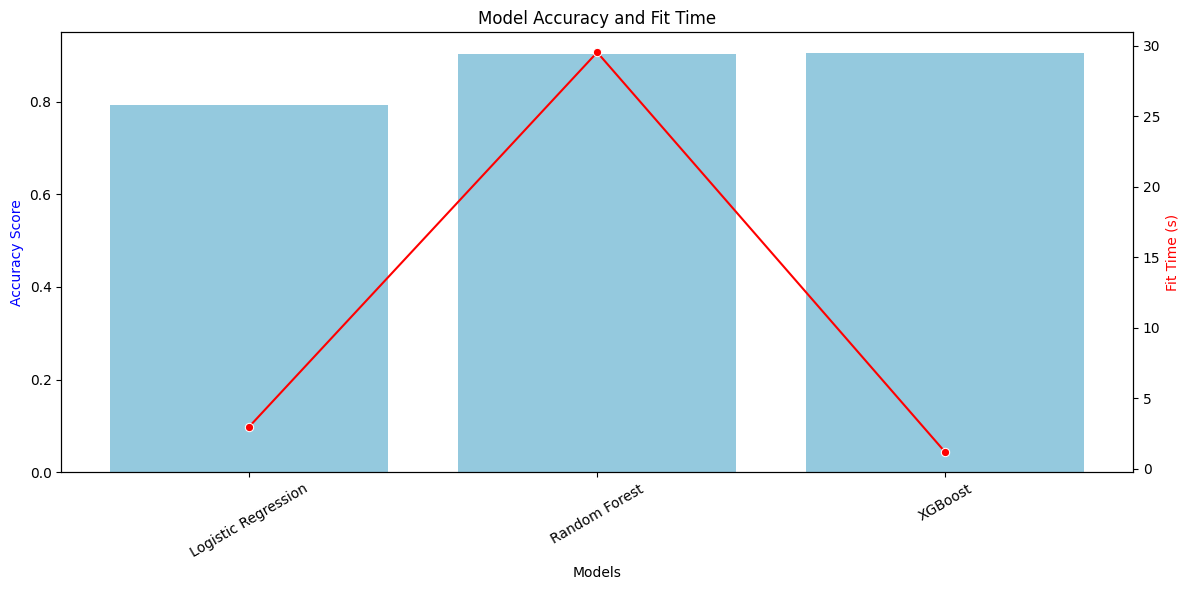

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))


sns.barplot(x='Model', y='Accuracy Score', data=result, ax=ax1, color= 'skyblue')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color= 'blue')
plt.xticks(rotation = 30)

ax2 = ax1.twinx()
sns.lineplot(x='Model', y='Fit Time (s)', data=result, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Fit Time (s)', color = 'red')

plt.title('Model Accuracy and Fit Time')
fig.tight_layout()

plt.show()

# 디자인이 영...

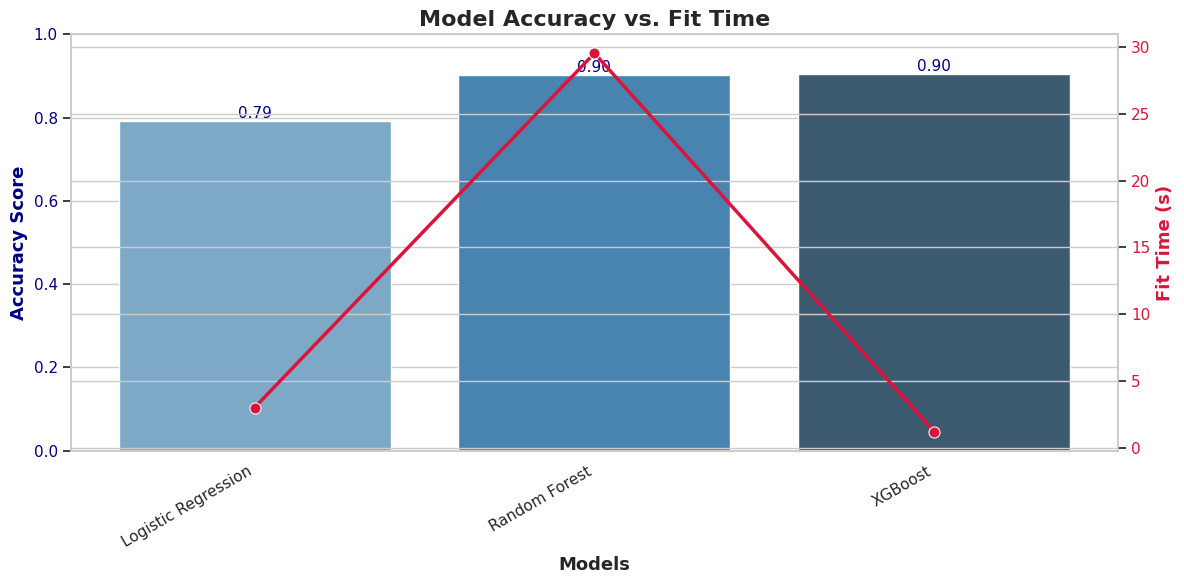

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 적용
sns.set(style='whitegrid')  # 깔끔한 흰 배경
plt.rcParams.update({'font.size': 12})  # 전체 폰트 크기 조절

# Figure 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축: Accuracy Score 바플롯
bar = sns.barplot(x='Model', y='Accuracy Score', data=result, ax=ax1, palette='Blues_d')
ax1.set_xlabel('Models', fontsize=13, fontweight='bold')
ax1.set_ylabel('Accuracy Score', color='navy', fontsize=13, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_ylim(0, 1)  # 정확도 0~1 기준으로 고정
plt.xticks(rotation=30, ha='right')

# 정확도 값 레이블 추가
for p in bar.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=11, color='navy')

# 두 번째 축: Fit Time 라인플롯
ax2 = ax1.twinx()
sns.lineplot(x='Model', y='Fit Time (s)', data=result, ax=ax2,
             color='crimson', marker='o', linewidth=2.5, markersize=8)
ax2.set_ylabel('Fit Time (s)', color='crimson', fontsize=13, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='crimson')

# 타이틀 & 여백 정리
plt.title('Model Accuracy vs. Fit Time', fontsize=16, fontweight='bold')
fig.tight_layout()

plt.show()


# ㅋㅋ 전보단 낫네


# ✅ 최적 모델 선정
보시다시피, **XGBoost 분류기(XGB Classifier)**는 우수한 성능을 보이며, 전체 정확도는 0.93이고 학습 시간도 가장 짧음  
이는 **랜덤 포레스트(Random Forest)**와 **로지스틱 회귀(Logistic Regression)**에 비해 뛰어난 결과  


# 🔚 결론
따라서 이 데이터셋에서는 XGBoost 분류기가 최적의 모델